# **Import Library and Dataset**

In [ ]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Import Calculations
from math import sqrt

# Import Outlier
from scipy import stats

# Import Split Train & Test
from sklearn.model_selection import train_test_split

# Import Standardization
from sklearn.preprocessing import StandardScaler

# Import Machine Learning
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Import Metrik
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Import Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

# Import Running Time
import time

In [ ]:
# Import Dataset
from google.colab import drive
drive.mount('/content/drive')

WILCOX1 = pd.read_excel('/content/drive/MyDrive/Github/Pore Pressure Prediction In Northern Carnarvon Basin/Dataset/WILCOX-1.xlsx')
WILCOX2 = pd.read_excel('/content/drive/MyDrive/Github/Pore Pressure Prediction In Northern Carnarvon Basin/Dataset/WILCOX-2.xlsx')
df = pd.concat([WILCOX1,WILCOX2])

Mounted at /content/drive


# **Exploratory Data Analysis (EDA)**

## **Dataset Description**

---

In [ ]:
# Display 5 Initial Dataset
df.head(5)

,DEPTH.FT,CALI.IN,DT.US/F,GR.GAPI,RHOB.G/C3,PP.PSI
0,1501.500048,17.19,120.87,40.51,1.950,838.865505
1,2529.500081,19.10,108.02,40.23,2.238,1434.475149
2,2530.000081,19.11,107.83,40.55,2.234,1433.896707
3,2530.500081,19.13,107.34,40.57,2.231,1431.901822
4,2531.000081,19.15,106.69,40.60,2.230,1429.117580


In [ ]:
# Display Data Type & Non-null Values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20736 entries, 0 to 8859
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DEPTH.FT   20736 non-null  float64
 1   CALI.IN    20736 non-null  float64
 2   DT.US/F    20736 non-null  float64
 3   GR.GAPI    20736 non-null  float64
 4   RHOB.G/C3  20736 non-null  float64
 5   PP.PSI     20736 non-null  float64
dtypes: float64(6)
memory usage: 1.1 MB


In [ ]:
# Number of Blank Rows
df.isnull().sum()

DEPTH.FT     0
CALI.IN      0
DT.US/F      0
GR.GAPI      0
RHOB.G/C3    0
PP.PSI       0
dtype: int64

In [ ]:
# Dataset Description
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DEPTH.FT,20736.0,9844.583839,1992.597447,1501.500048,8571.875274,9912.500317,11284.500361,13467.500431
CALI.IN,20736.0,12.697967,2.256022,8.193000,12.150000,12.500000,13.500000,24.780000
DT.US/F,20736.0,88.754326,11.606277,46.180000,78.897500,88.825000,97.840000,133.350000
GR.GAPI,20736.0,84.936413,34.438430,40.000000,56.090000,73.560000,112.060000,234.330000
RHOB.G/C3,20736.0,2.483790,0.111718,1.320000,2.447000,2.487000,2.534000,3.336000
PP.PSI,20736.0,5474.139694,1145.856969,838.865505,4830.302575,5737.320936,6319.906568,8981.648788


In [ ]:
# Shape Of The Dataset
df.shape

(20736, 6)

In [ ]:
# Column Of The Dataset
df.columns

Index(['DEPTH.FT', 'CALI.IN', 'DT.US/F', 'GR.GAPI', 'RHOB.G/C3', 'PP.PSI'], dtype='object')

## **Univariate Data Analysis**

---

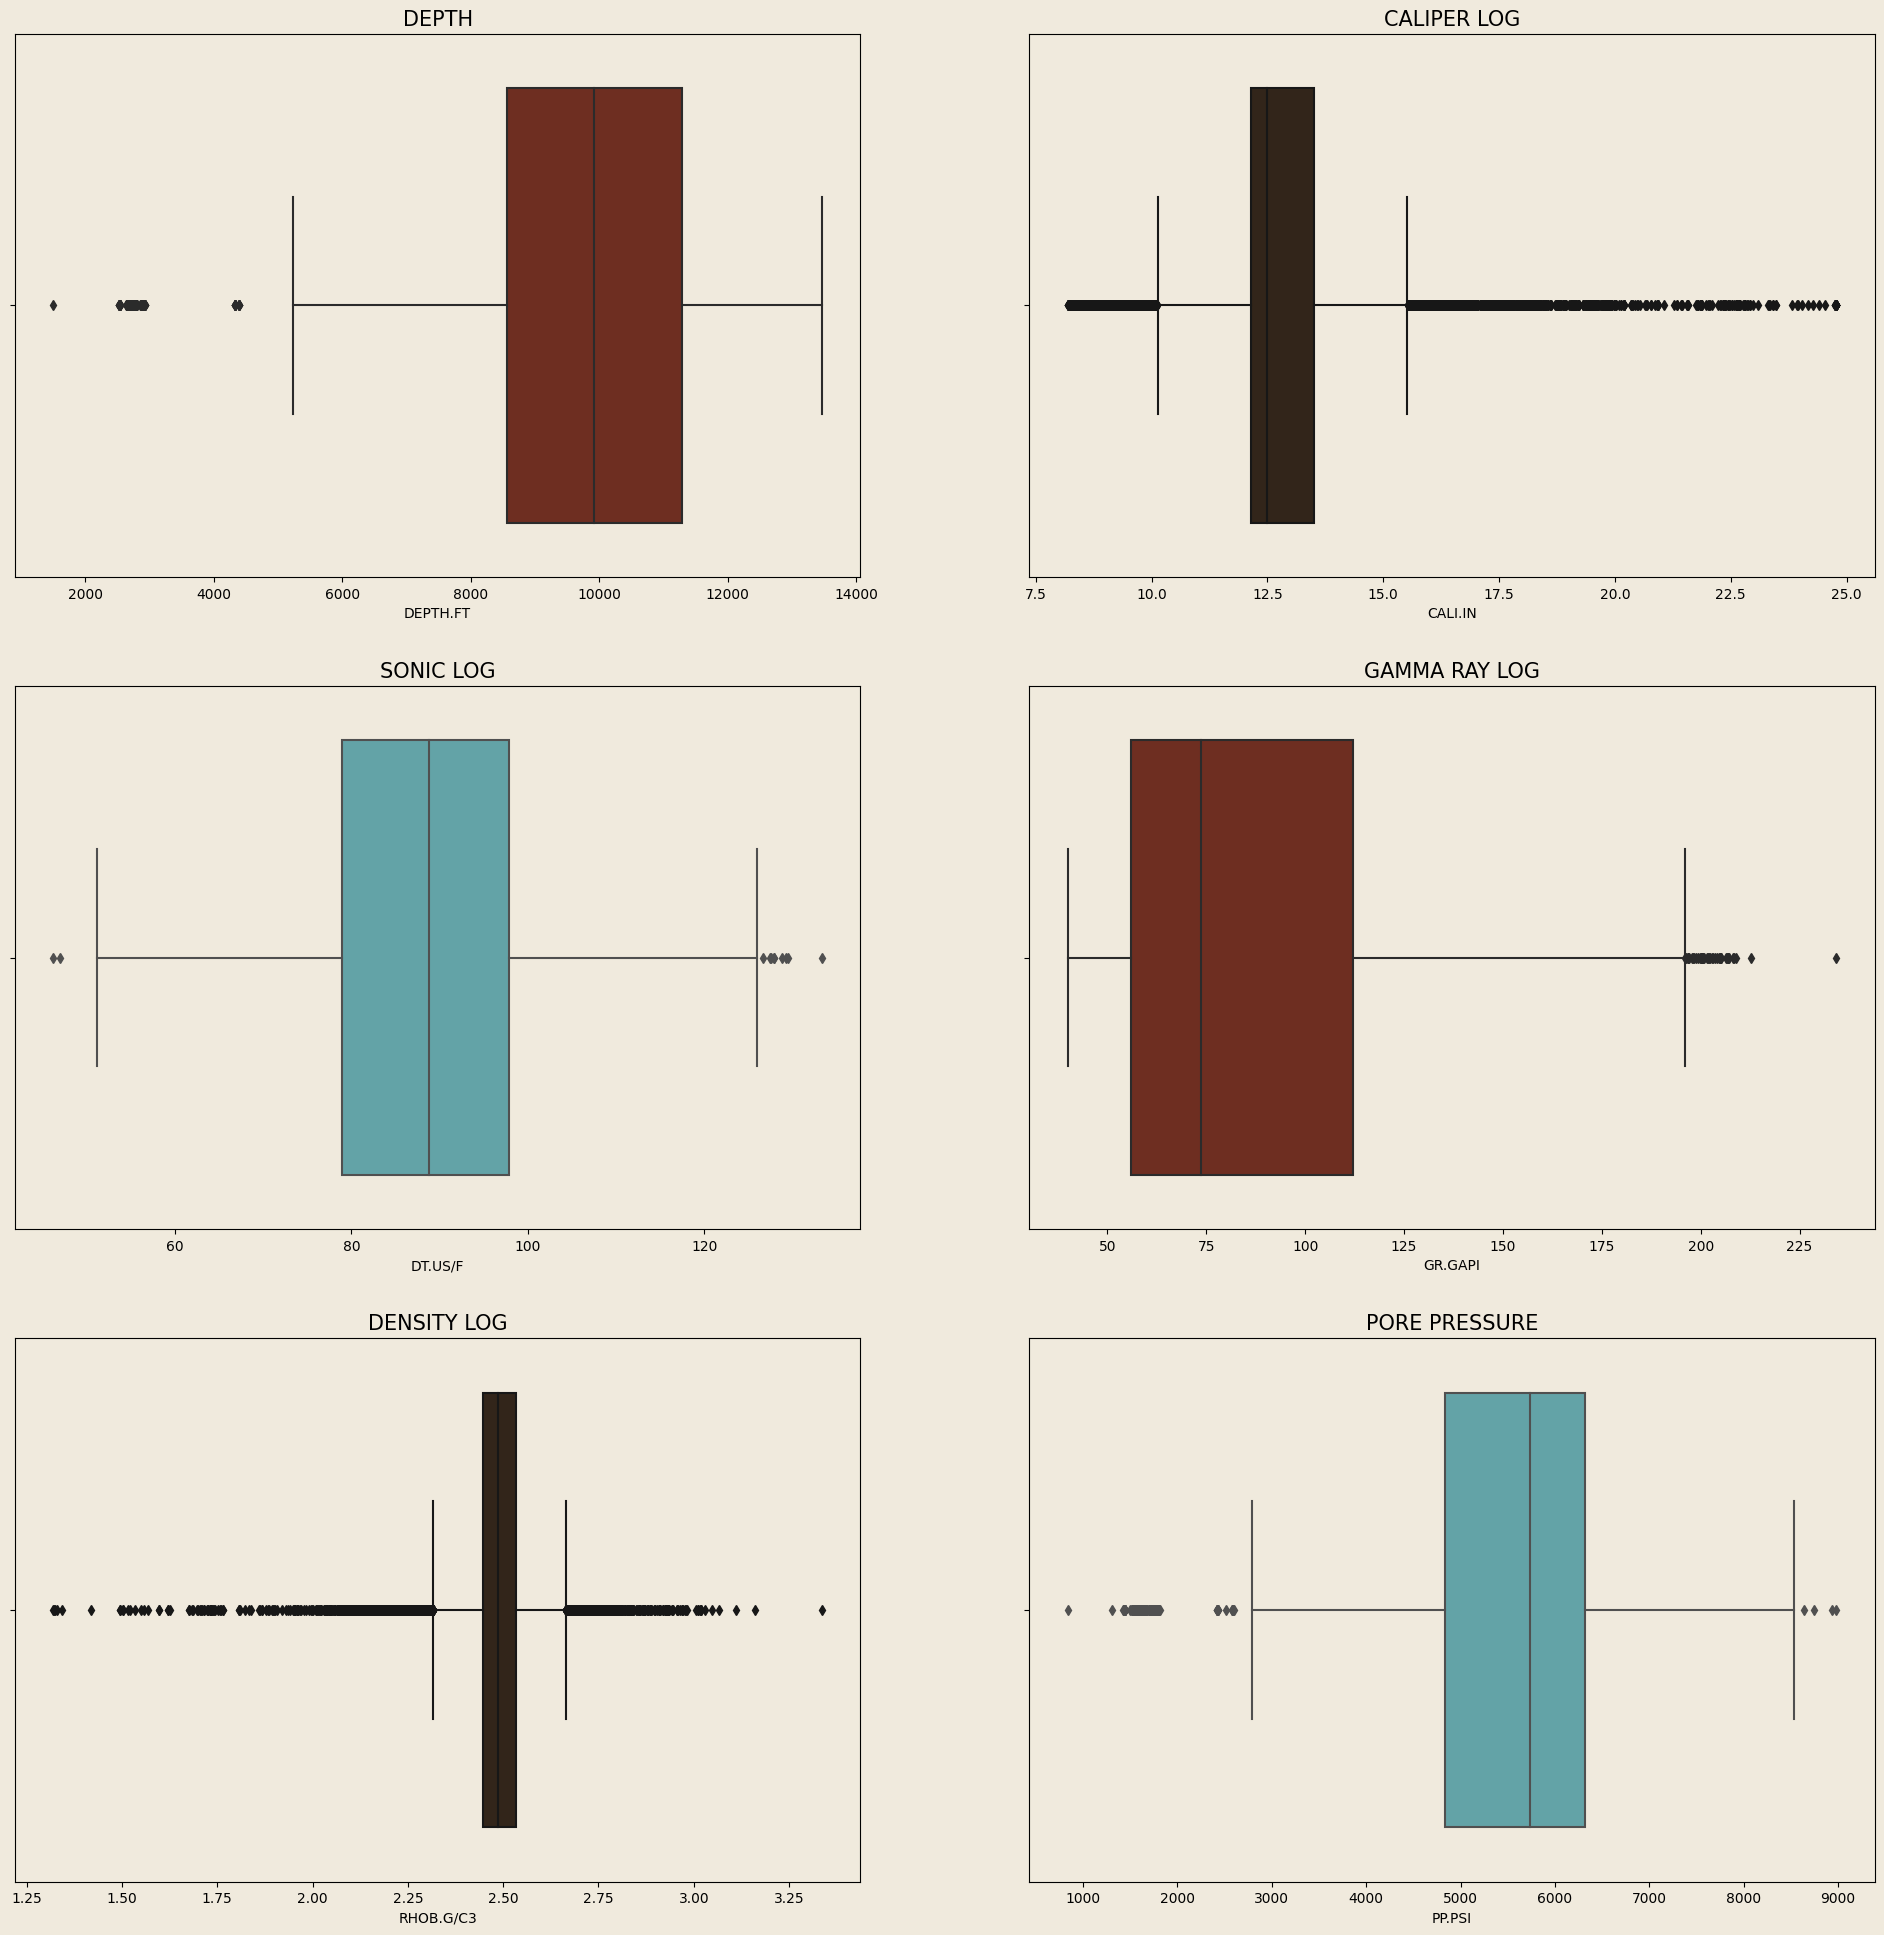

In [ ]:
# Create Figure And Axis
fig, axes = plt.subplots(3, 2, figsize=(24, 24), facecolor='#F0EADD')

# Create Box-Plot For Depth
sns.boxplot(x=df['DEPTH.FT'], color="#7B2514", ax=axes[0, 0])
axes[0, 0].set_title('DEPTH', fontsize=15)
axes[0, 0].set_facecolor('#F0EADD')

# Create Box-Plot For Caliper Log
sns.boxplot(x=df['CALI.IN'], color="#362416", ax=axes[0, 1])
axes[0, 1].set_title('CALIPER LOG', fontsize=15)
axes[0, 1].set_facecolor('#F0EADD')

# Create Box-Plot For Sonic Log
sns.boxplot(x=df['DT.US/F'], color="#58ADB2", ax=axes[1, 0])
axes[1, 0].set_title('SONIC LOG', fontsize=15)
axes[1, 0].set_facecolor('#F0EADD')

# Create Box-Plot For Gamma Ray Log
sns.boxplot(x=df['GR.GAPI'], color="#7B2514", ax=axes[1, 1])
axes[1, 1].set_title('GAMMA RAY LOG', fontsize=15)
axes[1, 1].set_facecolor('#F0EADD')

# Create Box-Plot For Density Log
sns.boxplot(x=df['RHOB.G/C3'], color="#362416", ax=axes[2, 0])
axes[2, 0].set_title('DENSITY LOG', fontsize=15)
axes[2, 0].set_facecolor('#F0EADD')

# Create Box-Plot For Pore Pressure
sns.boxplot(x=df['PP.PSI'], color="#58ADB2", ax=axes[2, 1])
axes[2, 1].set_title('PORE PRESSURE', fontsize=15)
axes[2, 1].set_facecolor('#F0EADD')

plt.show()

## **Outliers Removal**

---

In [ ]:
# Set Outlier using Z-score Method
z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

In [ ]:
# Dataset Description After Removing Outlier
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DEPTH.FT,19937.0,9917.101909,1827.431657,4324.000138,8621.500276,9936.500318,11267.500361,13467.500431
CALI.IN,19937.0,12.543941,1.954915,8.193000,12.150000,12.480000,13.440000,19.450000
DT.US/F,19937.0,88.550714,11.332670,55.740000,78.900000,88.630000,97.360000,123.220000
GR.GAPI,19937.0,84.876489,33.473296,40.000000,56.630000,73.630000,112.000000,188.130000
RHOB.G/C3,19937.0,2.491836,0.082982,2.149000,2.451000,2.489000,2.534000,2.817000
PP.PSI,19937.0,5519.472624,1066.614423,2414.115806,4888.769860,5753.112309,6328.454965,8376.669548


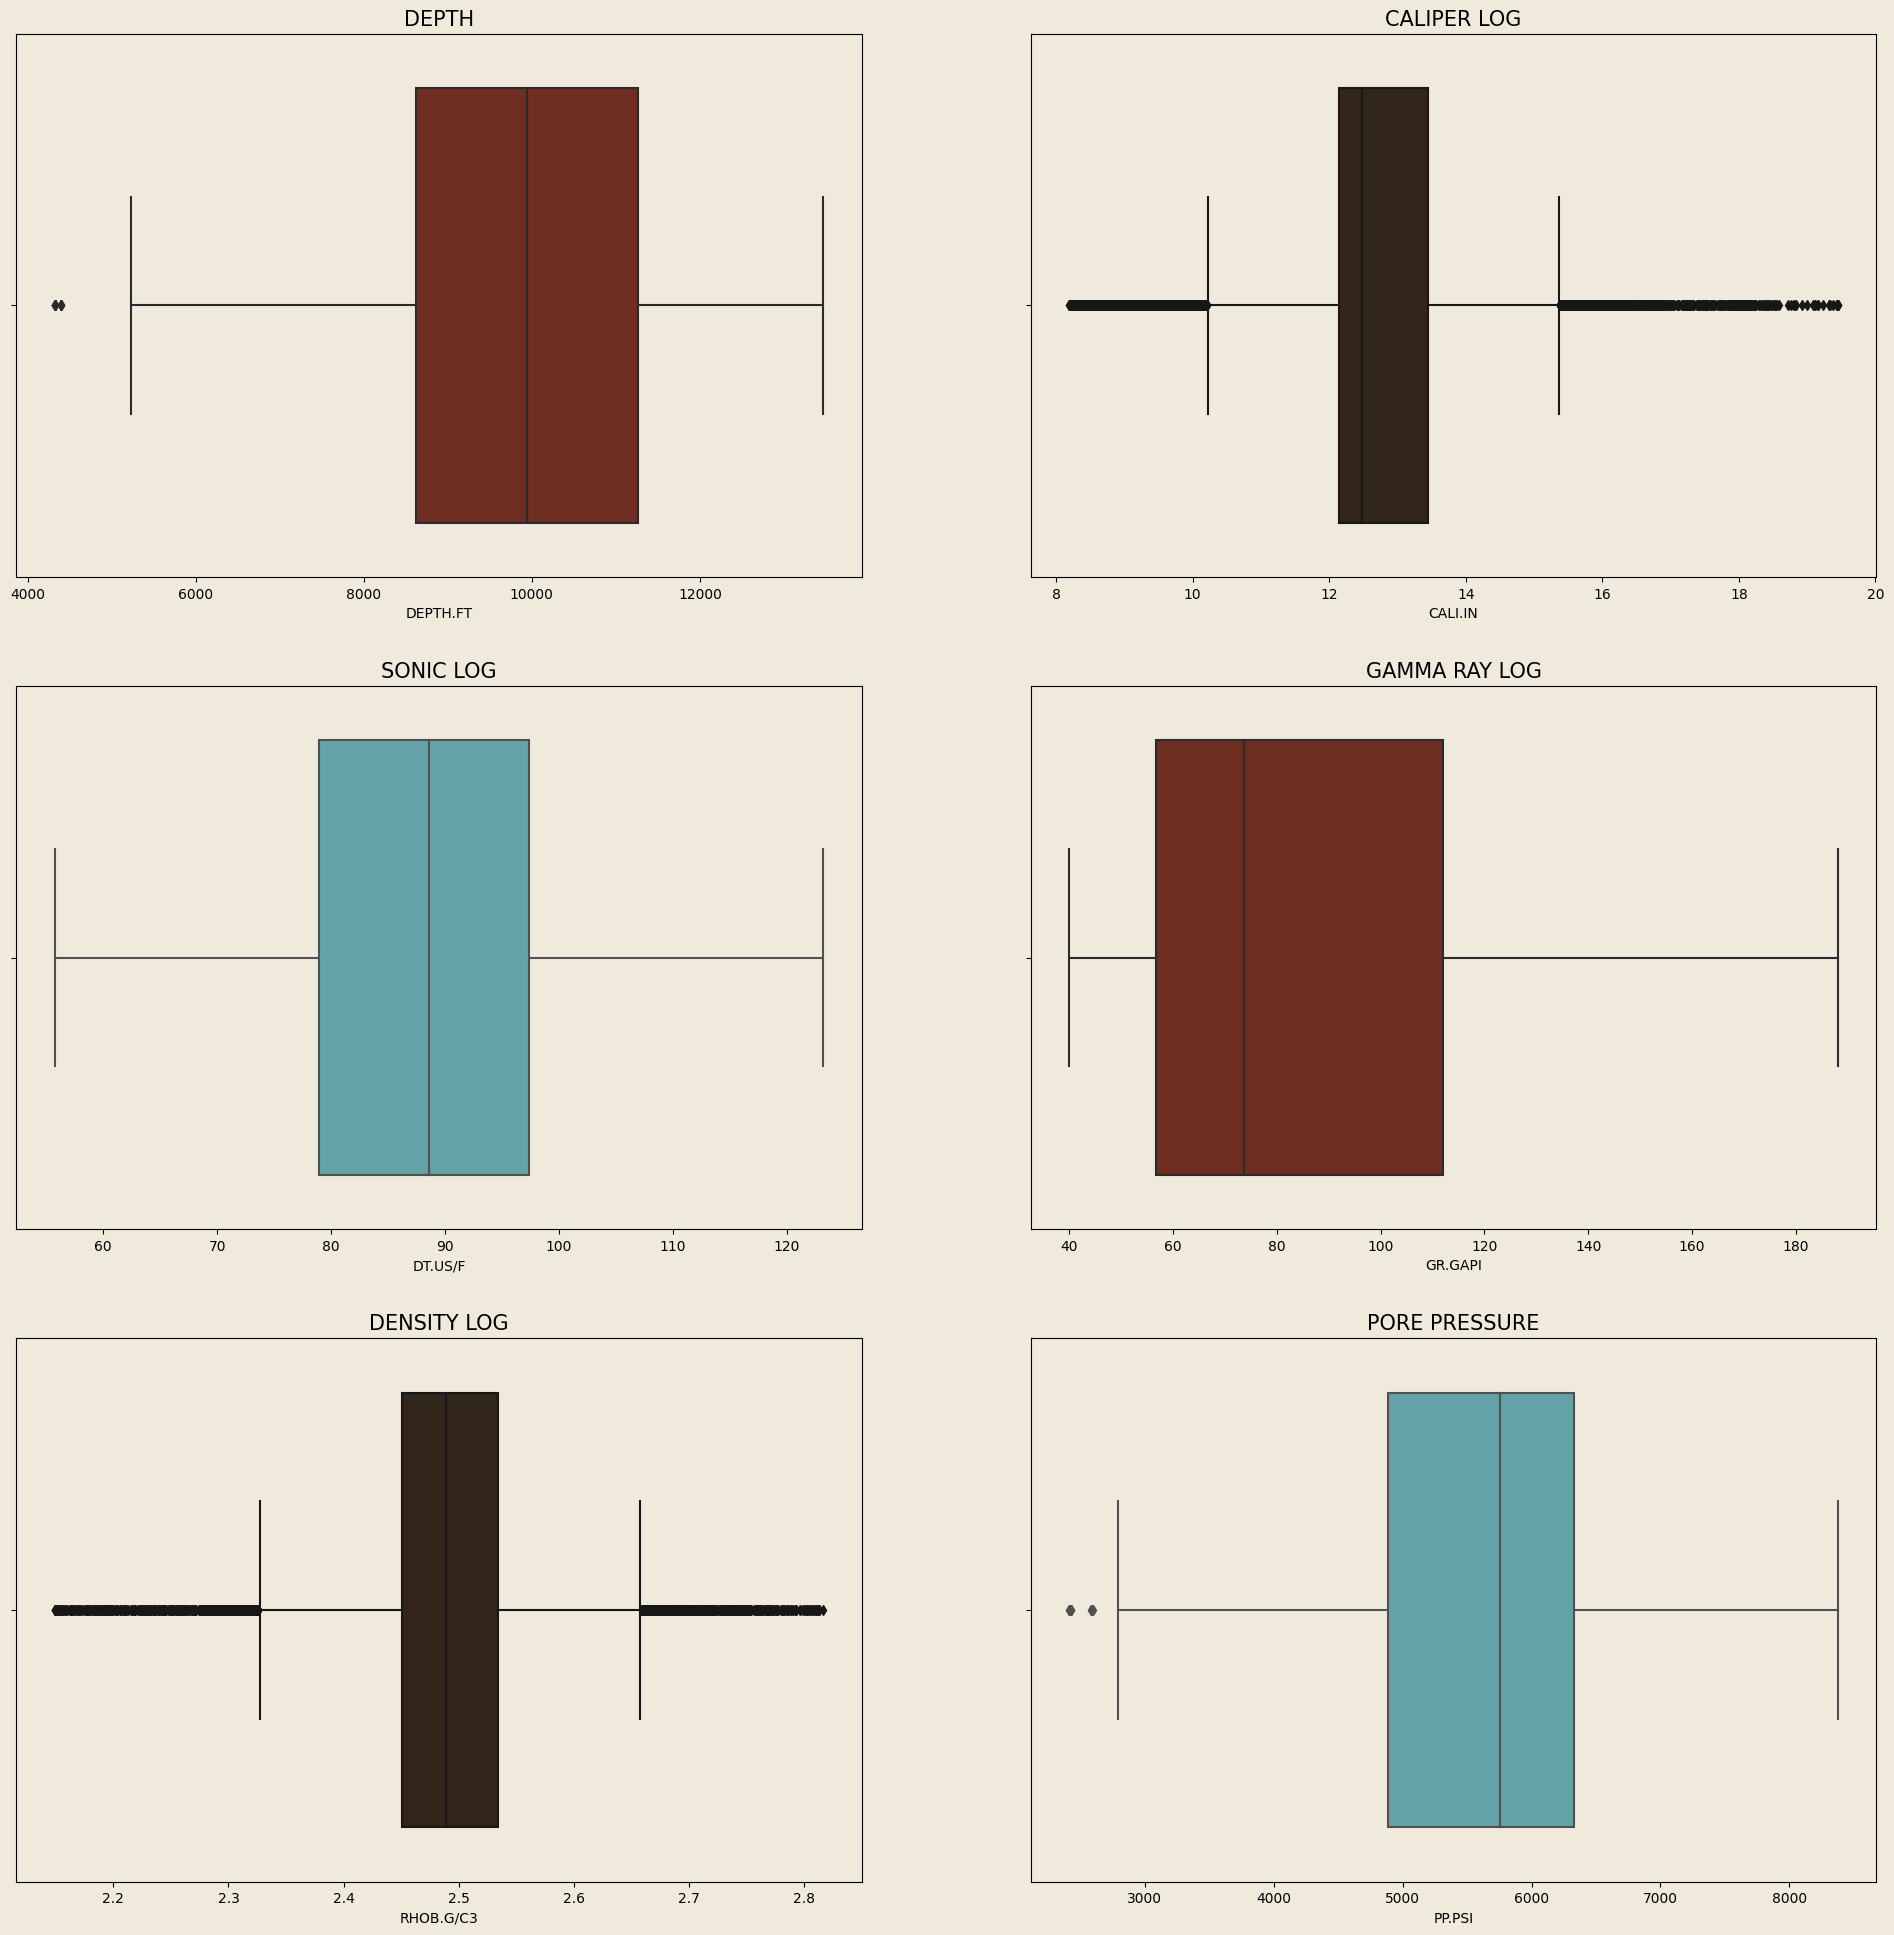

In [ ]:
# Create Figure And Axis
fig, axes = plt.subplots(3, 2, figsize=(24, 24), facecolor='#F0EADD')

# Create Box-Plot For Depth
sns.boxplot(x=df['DEPTH.FT'], color="#7B2514", ax=axes[0, 0])
axes[0, 0].set_title('DEPTH', fontsize=15)
axes[0, 0].set_facecolor('#F0EADD')

# Create Box-Plot For Caliper Log
sns.boxplot(x=df['CALI.IN'], color="#362416", ax=axes[0, 1])
axes[0, 1].set_title('CALIPER LOG', fontsize=15)
axes[0, 1].set_facecolor('#F0EADD')

# Create Box-Plot For Sonic Log
sns.boxplot(x=df['DT.US/F'], color="#58ADB2", ax=axes[1, 0])
axes[1, 0].set_title('SONIC LOG', fontsize=15)
axes[1, 0].set_facecolor('#F0EADD')

# Create Box-Plot For Gamma Ray Log
sns.boxplot(x=df['GR.GAPI'], color="#7B2514", ax=axes[1, 1])
axes[1, 1].set_title('GAMMA RAY LOG', fontsize=15)
axes[1, 1].set_facecolor('#F0EADD')

# Create Box-Plot For Density Log
sns.boxplot(x=df['RHOB.G/C3'], color="#362416", ax=axes[2, 0])
axes[2, 0].set_title('DENSITY LOG', fontsize=15)
axes[2, 0].set_facecolor('#F0EADD')

# Create Box-Plot For Pore Pressure
sns.boxplot(x=df['PP.PSI'], color="#58ADB2", ax=axes[2, 1])
axes[2, 1].set_title('PORE PRESSURE', fontsize=15)
axes[2, 1].set_facecolor('#F0EADD')

plt.show()

## **Multivariate Data Analysis**

---

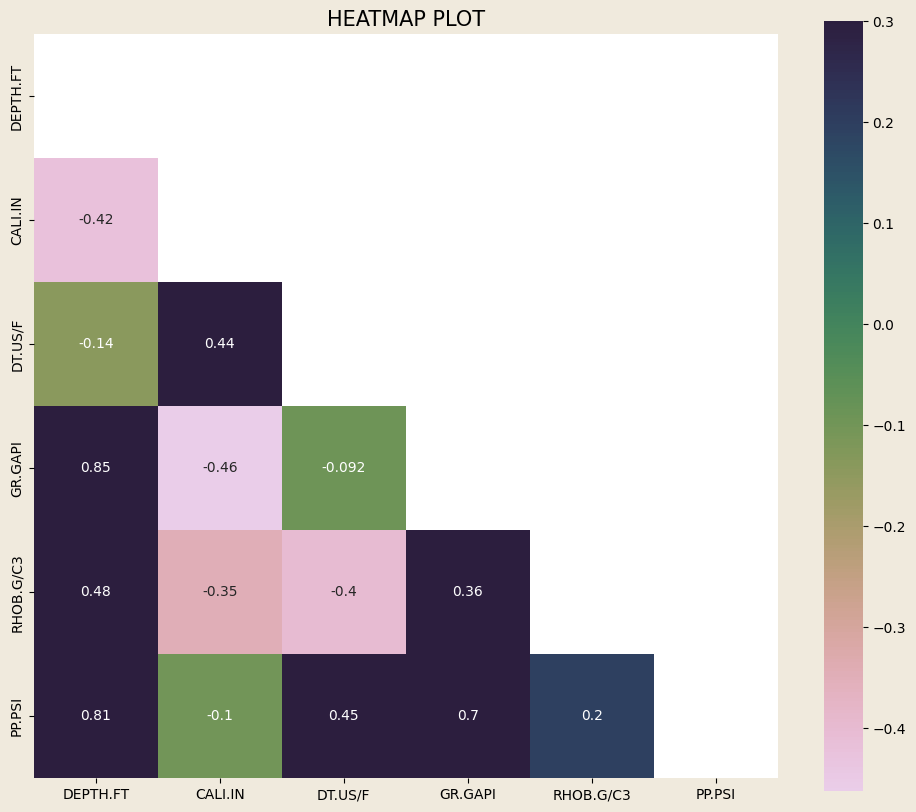

In [ ]:
# Generate A Mask For The Upper Triangle
corr = df.corr(method = 'pearson')
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Create A Colormap
cmap = sns.cubehelix_palette(n_colors=8, start=-2.25, rot=-1.3, as_cmap=True)

# Plot The Heatmap
plt.figure(figsize=(12,10), facecolor='#F0EADD')
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=.3, square=True)

plt.title('HEATMAP PLOT', fontsize=15)
plt.show()

# **Data Preprocessing**

In [ ]:
# Set Independent Features & Dependent Features Data
X = df.drop(columns=['PP.PSI'], axis=1)
Y = df['PP.PSI']

In [ ]:
# Split Data Training & Data Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [ ]:
# Standardization Using Standard Scaler
scalerX = StandardScaler().fit(X_train)
X_train_scaled = scalerX.transform(X_train)
X_test_scaled = scalerX.transform(X_test)

In [ ]:
# Split For Modelling MLP Regressor
X_train_mlp = X_train; Y_train_mlp = Y_train; X_train_scaled_mlp = X_train_scaled
X_test_mlp = X_test; Y_test_mlp = Y_test; X_test_scaled_mlp = X_test_scaled

# Split For Modelling Random Forest Regressor
X_train_rf = X_train; Y_train_rf = Y_train; X_train_scaled_rf = X_train_scaled
X_test_rf = X_test; Y_test_rf = Y_test; X_test_scaled_rf = X_test_scaled

# Split For Modelling XGBoost Regressor
X_train_xgb = X_train; Y_train_xgb = Y_train; X_train_scaled_xgb = X_train_scaled
X_test_xgb = X_test; Y_test_xgb = Y_test; X_test_scaled_xgb = X_test_scaled

# **MLP Model**

## **Train & Test Modelling**

---



In [ ]:
# MLP Regressor Modeling
mlp_regressor = MLPRegressor(random_state=0)
mlp_regressor.fit(X_train_scaled_mlp, Y_train_mlp)

MLPRegressor(random_state=0)

### **Train Modelling**

In [ ]:
# Make Predictions & Evaluate The Model's Performance
Y_pred_train_mlp = mlp_regressor.predict(X_train_scaled_mlp)

# Calculate The Metrics
r2_train = round(r2_score(Y_train_mlp, Y_pred_train_mlp),4)
mape_train = round(metrics.mean_absolute_percentage_error(Y_train_mlp, Y_pred_train_mlp),4)
mae_train = round(metrics.mean_absolute_error(Y_train_mlp, Y_pred_train_mlp),4)
rmse_train = round(sqrt(metrics.mean_squared_error(Y_train_mlp, Y_pred_train_mlp)),4)
mse_train = round(metrics.mean_squared_error(Y_train_mlp, Y_pred_train_mlp),4)

# Print The Metrics
print('Metrics Score Train Before Hyperparameter Tuning')
print('R2\t', r2_train)
print('MAPE\t', mape_train)
print('MAE\t', mae_train)
print('RMSE\t', rmse_train)
print('MSE\t', mse_train)

Metrics Score Train Before Hyperparameter Tuning
R2	 0.9667
MAPE	 0.026
MAE	 139.7108
RMSE	 195.3025
MSE	 38143.0662


### **Test Modelling**

In [ ]:
# Make Predictions & Evaluate The Model's Performance
Y_pred_test_mlp = mlp_regressor.predict(X_test_scaled_mlp)

# Calculate The Metrics
MLP_r2_test = round(r2_score(Y_test_mlp, Y_pred_test_mlp),4)
mape_test = round(metrics.mean_absolute_percentage_error(Y_test_mlp, Y_pred_test_mlp),4)
mae_test = round(metrics.mean_absolute_error(Y_test_mlp, Y_pred_test_mlp),4)
rmse_test = round(sqrt(metrics.mean_squared_error(Y_test_mlp, Y_pred_test_mlp)),4)
mse_test = round(metrics.mean_squared_error(Y_test_mlp, Y_pred_test_mlp),4)

# Print The Metrics
print('Metrics Score Test Before Hyperparameter Tuning')
print('R2\t', MLP_r2_test)
print('MAPE\t', mape_test)
print('MAE\t', mae_test)
print('RMSE\t', rmse_test)
print('MSE\t', mse_test)

Metrics Score Test Before Hyperparameter Tuning
R2	 0.965
MAPE	 0.0261
MAE	 141.8082
RMSE	 197.8205
MSE	 39132.9504


In [ ]:
# Run-time
all_features_time = []

for _ in range(5):
    start_time = time.time()
    mlp_regressor.fit(X_train_scaled_mlp, Y_train_mlp)
    predictions_nn = mlp_regressor.predict(X_test_scaled_mlp)
    end_time = time.time()
    all_features_time.append(end_time - start_time)

all_features_time = np.mean(all_features_time)
print('Run-time:', round(all_features_time, 2), 'seconds.')

Run-time: 25.25 seconds.


### **Prediction & Test Graph of Predicted Vs Actual**

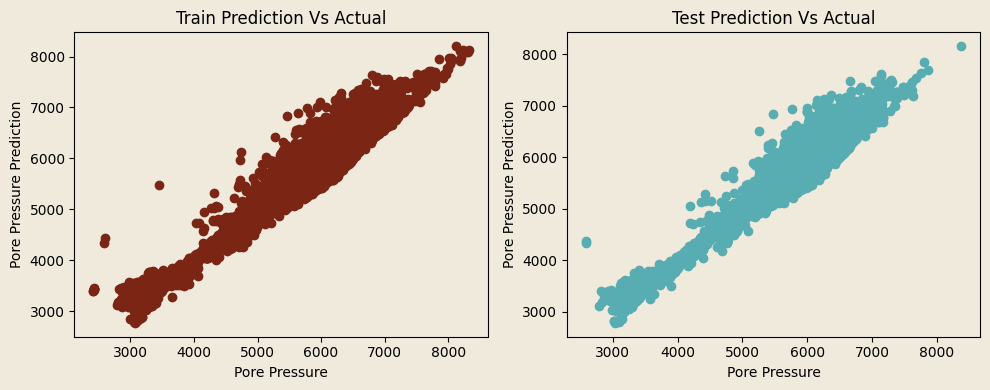

In [ ]:
# Prediction & Test Graph of Predicted Vs Actual Pore Pressure on MLP Before Hyperparameter Tuning
def visualize_performance(Y_train_mlp, Y_pred_train_mlp, Y_test_mlp, Y_pred_test_mlp):
    fig, axs = plt.subplots(1, 2, figsize=(10, 4), facecolor='#F0EADD')

    # Training set scatter plot
    axs[0].scatter(Y_train_mlp, Y_pred_train_mlp, color="#7B2514")
    axs[0].set_facecolor('#F0EADD')
    axs[0].set_xlabel("Pore Pressure")
    axs[0].set_ylabel("Pore Pressure Prediction")
    axs[0].set_title("Train Prediction Vs Actual")

    # Test set scatter plot
    axs[1].scatter(Y_test_mlp, Y_pred_test_mlp, color="#58ADB2")
    axs[1].set_facecolor('#F0EADD')
    axs[1].set_xlabel("Pore Pressure")
    axs[1].set_ylabel("Pore Pressure Prediction")
    axs[1].set_title("Test Prediction Vs Actual")

    plt.tight_layout()
    plt.show()

visualize_performance(Y_train_mlp, Y_pred_train_mlp, Y_test_mlp, Y_pred_test_mlp)

## **Hyperparameter Tuning**

---

In [ ]:
# Set Parameter Hyperparameter Tuning Model MLP Regressor
parameters = {'solver' : ['lbfgs', 'sgd', 'adam'],
              'hidden_layer_sizes' : [(100,), (120,80,40), (100,50,30), (150,100,50), (100,30)],
              'activation' : ['identity', 'logistic', 'tanh', 'relu'],
              'alpha' : [0.0001, 0.001, 0.01, 0.1],
              'batch_size' : ['auto', 200],
              'learning_rate' : ['constant', 'invscaling', 'adaptive'],
              'learning_rate_init' : [0.001, 0.01],
              'max_iter' : [50, 100, 300, 500, 1000]}

# Set RandomizedSearchCV for Hyperparameter Tuning Model MLP Regressor
mlp_base = MLPRegressor(random_state=0)
mlp_random_search = RandomizedSearchCV(mlp_base, parameters, n_iter = 10, cv = 3, verbose = 2, random_state = 0,
                               n_jobs = -1, return_train_score = True)

# Fit The Model To The Training Data
mlp_random_search.fit(X_train_scaled_mlp, Y_train_mlp)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=MLPRegressor(random_state=0), n_jobs=-1,
                   param_distributions={'activation': ['identity', 'logistic',
                                                       'tanh', 'relu'],
                                        'alpha': [0.0001, 0.001, 0.01, 0.1],
                                        'batch_size': ['auto', 200],
                                        'hidden_layer_sizes': [(100,),
                                                               (120, 80, 40),
                                                               (100, 50, 30),
                                                               (150, 100, 50),
                                                               (100, 30)],
                                        'learning_rate': ['constant',
                                                          'invscaling',
                                                          'adaptive'],
                                        'learning_rate_init': [0.001, 0.01],
                                        'max_iter': [50, 100, 300, 500, 1000],
                                        'solver': ['lbfgs', 'sgd', 'adam']},
                   random_state=0, return_train_score=True, verbose=2)

In [ ]:
# Best Hyperparameter Tuning Model MLP Regressor
mlp_random_search.best_params_

{'solver': 'lbfgs',
 'max_iter': 500,
 'learning_rate_init': 0.001,
 'learning_rate': 'adaptive',
 'hidden_layer_sizes': (100,),
 'batch_size': 200,
 'alpha': 0.1,
 'activation': 'relu'}

In [ ]:
# Set Best Hyperparameter Tuning Model MLP Regressor
best_random_mlp = mlp_random_search.best_estimator_
best_random_mlp.fit(X_train_scaled_mlp, Y_train_mlp)

MLPRegressor(alpha=0.1, batch_size=200, learning_rate='adaptive', max_iter=500,
             random_state=0, solver='lbfgs')

### **Train Modelling**

In [ ]:
# Make Predictions & Evaluate The Model's Performance
best_prediction_train_mlp = best_random_mlp.predict(X_train_scaled_mlp)

# Calculate The Metrics
r2_train = round(r2_score(Y_train_mlp, best_prediction_train_mlp),4)
mape_train = round(metrics.mean_absolute_percentage_error(Y_train_mlp, best_prediction_train_mlp),4)
mae_train = round(metrics.mean_absolute_error(Y_train_mlp, best_prediction_train_mlp),4)
rmse_train = round(sqrt(metrics.mean_squared_error(Y_train_mlp, best_prediction_train_mlp)),4)
mse_train = round(metrics.mean_squared_error(Y_train_mlp, best_prediction_train_mlp),4)

# Print The Metrics
print('Metrics Score Training After Hyperparameter Tuning')
print('R2\t', r2_train)
print('MAPE\t', mape_train)
print('MAE\t', mae_train)
print('RMSE\t', rmse_train)
print('MSE\t', mse_train)

Metrics Score Training After Hyperparameter Tuning
R2	 0.9998
MAPE	 0.0018
MAE	 9.7538
RMSE	 13.8383
MSE	 191.4986


### **Test Modelling**

In [ ]:
# Make Predictions & Evaluate The Model's Performance
best_prediction_test_mlp = best_random_mlp.predict(X_test_scaled_mlp)

# Calculate The Metrics
r2_test = round(r2_score(Y_test_mlp, best_prediction_test_mlp),4)
mape_test = round(metrics.mean_absolute_percentage_error(Y_test_mlp, best_prediction_test_mlp),4)
mae_test = round(metrics.mean_absolute_error(Y_test_mlp, best_prediction_test_mlp),4)
rmse_test = round(sqrt(metrics.mean_squared_error(Y_test_mlp, best_prediction_test_mlp)),4)
mse_test = round(metrics.mean_squared_error(Y_test_mlp, best_prediction_test_mlp),4)

# Print The Metrics
print('Metrics Score Test After Hyperparameter Tuning')
print('R2\t', r2_test)
print('MAPE\t', mape_test)
print('MAE\t', mae_test)
print('RMSE\t', rmse_test)
print('MSE\t', mse_test)

Metrics Score Test After Hyperparameter Tuning
R2	 0.9998
MAPE	 0.0017
MAE	 9.6611
RMSE	 13.2247
MSE	 174.8926


In [ ]:
# Run-time
all_features_time = []

for _ in range(5):
    start_time = time.time()
    best_random_mlp.fit(X_train_scaled_mlp, Y_train_mlp)
    predictions_nn = best_random_mlp.predict(X_test_scaled_mlp)
    end_time = time.time()
    all_features_time.append(end_time - start_time)

all_features_time = np.mean(all_features_time)
print('Run-time:', round(all_features_time, 2), 'seconds.')

Run-time: 25.62 seconds.


### **Prediction & Test Graph of Predicted Vs Actual**

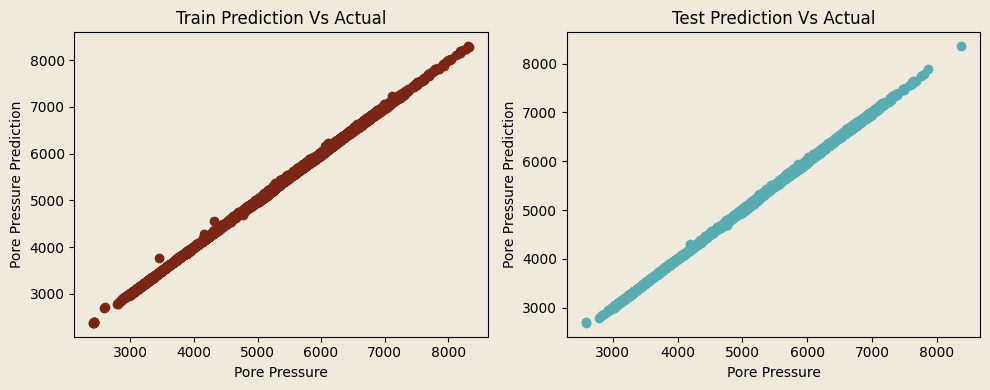

In [ ]:
# Prediction & Test Graph of Predicted Vs Actual Pore Pressure on MLP After Hyperparameter Tuning
def visualize_performance(Y_train_mlp, best_prediction_train_mlp, Y_test_mlp, best_prediction_test_mlp):
    fig, axs = plt.subplots(1, 2, figsize=(10, 4), facecolor='#F0EADD')

    # Training set scatter plot
    axs[0].scatter(Y_train_mlp, best_prediction_train_mlp, color="#7B2514")
    axs[0].set_facecolor('#F0EADD')
    axs[0].set_xlabel("Pore Pressure")
    axs[0].set_ylabel("Pore Pressure Prediction")
    axs[0].set_title("Train Prediction Vs Actual")

    # Test set scatter plot
    axs[1].scatter(Y_test_mlp, best_prediction_test_mlp, color="#58ADB2")
    axs[1].set_facecolor('#F0EADD')
    axs[1].set_xlabel("Pore Pressure")
    axs[1].set_ylabel("Pore Pressure Prediction")
    axs[1].set_title("Test Prediction Vs Actual")

    plt.tight_layout()
    plt.show()

visualize_performance(Y_train_mlp, best_prediction_train_mlp, Y_test_mlp, best_prediction_test_mlp)

# **Random Forest Model**

## **Train & Test Modelling**

---



In [ ]:
# Random Forest Modeling
rf_regressor = RandomForestRegressor(random_state=0)
rf_regressor.fit(X_train_scaled_rf, Y_train_rf)

RandomForestRegressor(random_state=0)

### **Train Modelling**

In [ ]:
# Make Predictions & Evaluate The Model's Performance
Y_pred_train_rf = rf_regressor.predict(X_train_scaled_mlp)

# Calculate The Metrics
r2_train = round(r2_score(Y_train_rf, Y_pred_train_rf),4)
mape_train = round(metrics.mean_absolute_percentage_error(Y_train_rf, Y_pred_train_rf),4)
mae_train = round(metrics.mean_absolute_error(Y_train_rf, Y_pred_train_rf),4)
rmse_train = round(sqrt(metrics.mean_squared_error(Y_train_rf, Y_pred_train_rf)),4)
mse_train = round(metrics.mean_squared_error(Y_train_rf, Y_pred_train_rf),4)

# Print The Metrics
print('Metrics Score Train Before Hyperparameter Tuning')
print('R2\t', r2_train)
print('MAPE\t', mape_train)
print('MAE\t', mae_train)
print('RMSE\t', rmse_train)
print('MSE\t', mse_train)

Metrics Score Train Before Hyperparameter Tuning
R2	 0.9999
MAPE	 0.0008
MAE	 4.0441
RMSE	 7.9277
MSE	 62.8483


### **Test Modelling**

In [ ]:
# Make Predictions & Evaluate The Model's Performance
Y_pred_test_rf = rf_regressor.predict(X_test_scaled_rf)

# Calculate The Metrics
MLP_r2_test = round(r2_score(Y_test_rf, Y_pred_test_rf),4)
mape_test = round(metrics.mean_absolute_percentage_error(Y_test_rf, Y_pred_test_rf),4)
mae_test = round(metrics.mean_absolute_error(Y_test_rf, Y_pred_test_rf),4)
rmse_test = round(sqrt(metrics.mean_squared_error(Y_test_rf, Y_pred_test_rf)),4)
mse_test = round(metrics.mean_squared_error(Y_test_rf, Y_pred_test_rf),4)

# Print The Metrics
print('Metrics Score Test Before Hyperparameter Tuning')
print('R2\t', MLP_r2_test)
print('MAPE\t', mape_test)
print('MAE\t', mae_test)
print('RMSE\t', rmse_test)
print('MSE\t', mse_test)

Metrics Score Test Before Hyperparameter Tuning
R2	 0.9997
MAPE	 0.0018
MAE	 9.7908
RMSE	 16.7548
MSE	 280.722


In [ ]:
# Run-time
all_features_time = []

for _ in range(5):
    start_time = time.time()
    rf_regressor.fit(X_train_scaled_rf, Y_train_rf)
    predictions_nn = rf_regressor.predict(X_test_scaled_rf)
    end_time = time.time()
    all_features_time.append(end_time - start_time)

all_features_time = np.mean(all_features_time)
print('Run-time:', round(all_features_time, 2), 'seconds.')

Run-time: 6.19 seconds.


### **Prediction & Test Graph of Predicted Vs Actual**

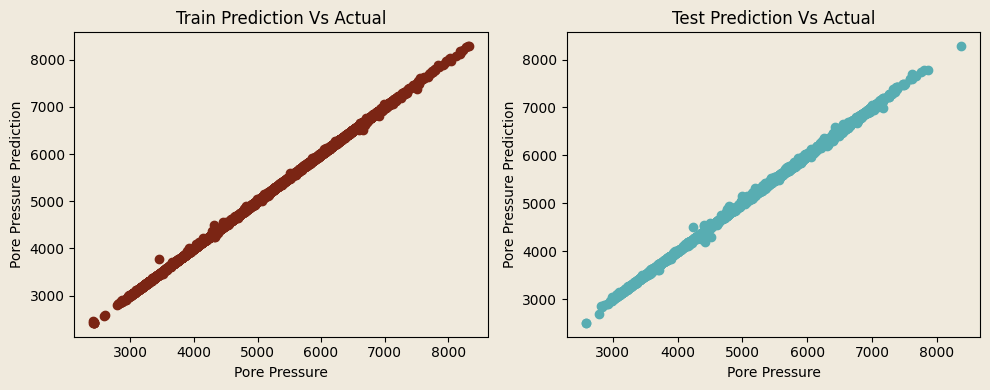

In [ ]:
# Prediction & Test Graph of Predicted Vs Actual Pore Pressure on MLP Before Hyperparameter Tuning
def visualize_performance(Y_train_rf, Y_pred_train_rf, Y_test_rf, Y_pred_test_rf):
    fig, axs = plt.subplots(1, 2, figsize=(10, 4), facecolor='#F0EADD')

    # Training set scatter plot
    axs[0].scatter(Y_train_rf, Y_pred_train_rf, color="#7B2514")
    axs[0].set_facecolor('#F0EADD')
    axs[0].set_xlabel("Pore Pressure")
    axs[0].set_ylabel("Pore Pressure Prediction")
    axs[0].set_title("Train Prediction Vs Actual")

    # Test set scatter plot
    axs[1].scatter(Y_test_rf, Y_pred_test_rf, color="#58ADB2")
    axs[1].set_facecolor('#F0EADD')
    axs[1].set_xlabel("Pore Pressure")
    axs[1].set_ylabel("Pore Pressure Prediction")
    axs[1].set_title("Test Prediction Vs Actual")

    plt.tight_layout()
    plt.show()

visualize_performance(Y_train_rf, Y_pred_train_rf, Y_test_rf, Y_pred_test_rf)

## **Hyperparameter Tuning**

---

In [ ]:
# Set Parameter Hyperparameter Tuning Model MLP Regressor
parameters = {'n_estimators': [int(x) for x in np.linspace(start = 2, stop = 2000, num = 50)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(4, 30, num = 2)],
               'min_samples_split': [2, 3, 4, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}

# Set RandomizedSearchCV for Hyperparameter Tuning Model MLP Regressor
rf_base = RandomForestRegressor(random_state=0)
rf_random_search = RandomizedSearchCV(rf_base, parameters, n_iter = 10, cv = 3, verbose = 2, random_state = 0,
                               n_jobs = -1, return_train_score = True)

# Fit The Model To The Training Data
rf_random_search.fit(X_train_scaled_rf, Y_train_rf)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [4, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 3, 4, 5, 10],
                                        'n_estimators': [2, 42, 83, 124, 165,
                                                         205, 246, 287, 328,
                                                         368, 409, 450, 491,
                                                         532, 572, 613, 654,
                                                         695, 735, 776, 817,
                                                         858, 899, 939, 980,
                                                         1021, 1062, 1102, 1143,
                                                         1184, ...]},
                   random_state=0, return_train_score=True, verbose=2)

In [ ]:
# Best Hyperparameter Tuning Model MLP Regressor
rf_random_search.best_params_

{'n_estimators': 124,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30,
 'bootstrap': True}

In [ ]:
# Set Best Hyperparameter Tuning Model MLP Regressor
best_random_rf = rf_random_search.best_estimator_
best_random_rf.fit(X_train_scaled_rf, Y_train_rf)

RandomForestRegressor(max_depth=30, max_features='auto', min_samples_split=5,
                      n_estimators=124, random_state=0)

### **Train Modelling**

In [ ]:
# Make Predictions & Evaluate The Model's Performance
best_prediction_train_rf = best_random_rf.predict(X_train_scaled_mlp)

# Calculate The Metrics
r2_train = round(r2_score(Y_train_rf, best_prediction_train_rf),4)
mape_train = round(metrics.mean_absolute_percentage_error(Y_train_rf, best_prediction_train_rf),4)
mae_train = round(metrics.mean_absolute_error(Y_train_rf, best_prediction_train_rf),4)
rmse_train = round(sqrt(metrics.mean_squared_error(Y_train_rf, best_prediction_train_rf)),4)
mse_train = round(metrics.mean_squared_error(Y_train_rf, best_prediction_train_rf),4)

# Print The Metrics
print('Metrics Score Training After Hyperparameter Tuning')
print('R2\t', r2_train)
print('MAPE\t', mape_train)
print('MAE\t', mae_train)
print('RMSE\t', rmse_train)
print('MSE\t', mse_train)

Metrics Score Training After Hyperparameter Tuning
R2	 0.9999
MAPE	 0.0009
MAE	 5.0516
RMSE	 9.8375
MSE	 96.7755


### **Test Modelling**

In [ ]:
# Make Predictions & Evaluate The Model's Performance
best_prediction_test_rf = best_random_rf.predict(X_test_scaled_mlp)

# Calculate The Metrics
r2_test = round(r2_score(Y_test_rf, best_prediction_test_rf),4)
mape_test = round(metrics.mean_absolute_percentage_error(Y_test_rf, best_prediction_test_rf),4)
mae_test = round(metrics.mean_absolute_error(Y_test_rf, best_prediction_test_rf),4)
rmse_test = round(sqrt(metrics.mean_squared_error(Y_test_rf, best_prediction_test_rf)),4)
mse_test = round(metrics.mean_squared_error(Y_test_rf, best_prediction_test_rf),4)

# Print The Metrics
print('Metrics Score Test After Hyperparameter Tuning')
print('R2\t', r2_test)
print('MAPE\t', mape_test)
print('MAE\t', mae_test)
print('RMSE\t', rmse_test)
print('MSE\t', mse_test)

Metrics Score Test After Hyperparameter Tuning
R2	 0.9997
MAPE	 0.0019
MAE	 10.1513
RMSE	 17.375
MSE	 301.8905


In [ ]:
# Run-time
all_features_time = []

for _ in range(5):
    start_time = time.time()
    best_random_rf.fit(X_train_scaled_rf, Y_train_rf)
    predictions_nn = best_random_rf.predict(X_test_scaled_rf)
    end_time = time.time()
    all_features_time.append(end_time - start_time)

all_features_time = np.mean(all_features_time)
print('Run-time:', round(all_features_time, 2), 'seconds.')

Run-time: 5.58 seconds.


### **Prediction & Test Graph of Predicted Vs Actual**

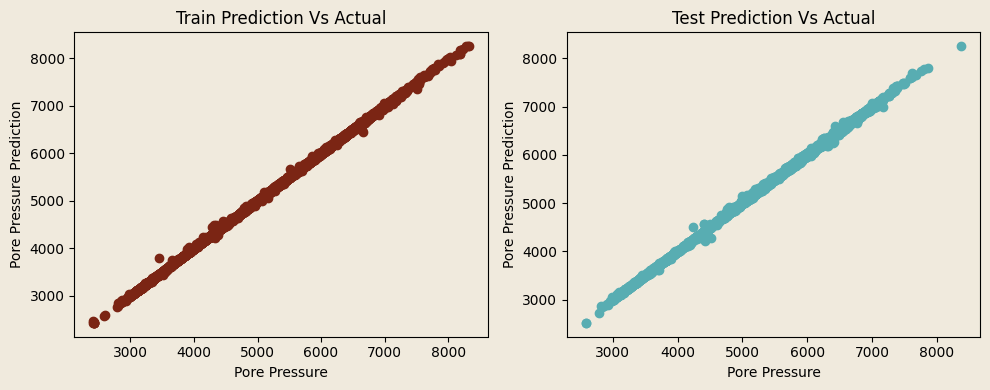

In [ ]:
# Prediction & Test Graph of Predicted Vs Actual Pore Pressure on MLP After Hyperparameter Tuning
def visualize_performance(Y_train_rf, best_prediction_train_rf, Y_test_rf, best_prediction_test_rf):
    fig, axs = plt.subplots(1, 2, figsize=(10, 4), facecolor='#F0EADD')

    # Training set scatter plot
    axs[0].scatter(Y_train_rf, best_prediction_train_rf, color="#7B2514")
    axs[0].set_facecolor('#F0EADD')
    axs[0].set_xlabel("Pore Pressure")
    axs[0].set_ylabel("Pore Pressure Prediction")
    axs[0].set_title("Train Prediction Vs Actual")

    # Test set scatter plot
    axs[1].scatter(Y_test_rf, best_prediction_test_rf, color="#58ADB2")
    axs[1].set_facecolor('#F0EADD')
    axs[1].set_xlabel("Pore Pressure")
    axs[1].set_ylabel("Pore Pressure Prediction")
    axs[1].set_title("Test Prediction Vs Actual")

    plt.tight_layout()
    plt.show()

visualize_performance(Y_train_rf, best_prediction_train_rf, Y_test_rf, best_prediction_test_rf)

# **XGBboost Model**

## **Train & Test Modelling**

---



In [ ]:
# XGBoost Regressor Modeling
xgb_regressor = XGBRegressor(random_state=0)
xgb_regressor.fit(X_train_scaled, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

### **Train Modelling**

In [ ]:
# Make Predictions & Evaluate The Model's Performance
Y_pred_train_xgb = xgb_regressor.predict(X_train_scaled_xgb)

# Calculate The Metrics
r2_train = round(r2_score(Y_train_xgb, Y_pred_train_xgb),4)
mape_train = round(metrics.mean_absolute_percentage_error(Y_train_xgb, Y_pred_train_xgb),4)
mae_train = round(metrics.mean_absolute_error(Y_train_xgb, Y_pred_train_xgb),4)
rmse_train = round(sqrt(metrics.mean_squared_error(Y_train_xgb, Y_pred_train_xgb)),4)
mse_train = round(metrics.mean_squared_error(Y_train_xgb, Y_pred_train_xgb),4)

# Print The Metrics
print('Metrics Score Train Before Hyperparameter Tuning')
print('R2\t', r2_train)
print('MAPE\t', mape_train)
print('MAE\t', mae_train)
print('RMSE\t', rmse_train)
print('MSE\t', mse_train)

Metrics Score Train Before Hyperparameter Tuning
R2	 0.9998
MAPE	 0.0021
MAE	 11.3186
RMSE	 15.0805
MSE	 227.4225


### **Test Modelling**

In [ ]:
# Make Predictions & Evaluate The Model's Performance
Y_pred_test_xgb = xgb_regressor.predict(X_test_scaled_xgb)

# Calculate The Metrics
MLP_r2_test = round(r2_score(Y_test_xgb, Y_pred_test_xgb),4)
mape_test = round(metrics.mean_absolute_percentage_error(Y_test_xgb, Y_pred_test_xgb),4)
mae_test = round(metrics.mean_absolute_error(Y_test_xgb, Y_pred_test_xgb),4)
rmse_test = round(sqrt(metrics.mean_squared_error(Y_test_xgb, Y_pred_test_xgb)),4)
mse_test = round(metrics.mean_squared_error(Y_test_xgb, Y_pred_test_xgb),4)

# Print The Metrics
print('Metrics Score Test Before Hyperparameter Tuning')
print('R2\t', MLP_r2_test)
print('MAPE\t', mape_test)
print('MAE\t', mae_test)
print('RMSE\t', rmse_test)
print('MSE\t', mse_test)

Metrics Score Test Before Hyperparameter Tuning
R2	 0.9994
MAPE	 0.0031
MAE	 16.5607
RMSE	 25.349
MSE	 642.5717


In [ ]:
# Run-time
all_features_time = []

for _ in range(5):
    start_time = time.time()
    xgb_regressor.fit(X_train_scaled_xgb, Y_train_xgb)
    predictions_nn = xgb_regressor.predict(X_test_scaled_xgb)
    end_time = time.time()
    all_features_time.append(end_time - start_time)

all_features_time = np.mean(all_features_time)
print('Run-time:', round(all_features_time, 2), 'seconds.')

Run-time: 0.23 seconds.


### **Prediction & Test Graph of Predicted Vs Actual**

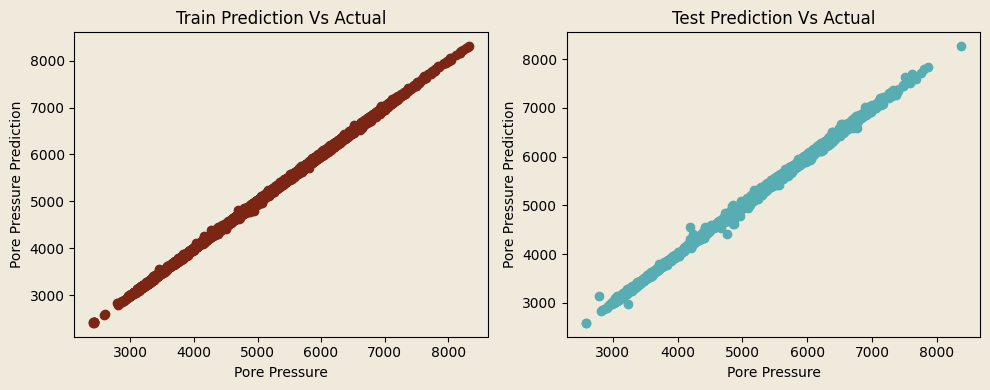

In [ ]:
# Prediction & Test Graph of Predicted Vs Actual Pore Pressure on MLP Before Hyperparameter Tuning
def visualize_performance(Y_train_xgb, Y_pred_train_xgb, Y_test_xgb, Y_pred_test_xgb):
    fig, axs = plt.subplots(1, 2, figsize=(10, 4), facecolor='#F0EADD')

    # Training set scatter plot
    axs[0].scatter(Y_train_xgb, Y_pred_train_xgb, color="#7B2514")
    axs[0].set_facecolor('#F0EADD')
    axs[0].set_xlabel("Pore Pressure")
    axs[0].set_ylabel("Pore Pressure Prediction")
    axs[0].set_title("Train Prediction Vs Actual")

    # Test set scatter plot
    axs[1].scatter(Y_test_xgb, Y_pred_test_xgb, color="#58ADB2")
    axs[1].set_facecolor('#F0EADD')
    axs[1].set_xlabel("Pore Pressure")
    axs[1].set_ylabel("Pore Pressure Prediction")
    axs[1].set_title("Test Prediction Vs Actual")

    plt.tight_layout()
    plt.show()

visualize_performance(Y_train_xgb, Y_pred_train_xgb, Y_test_xgb, Y_pred_test_xgb)

## **Hyperparameter Tuning**

---

In [ ]:
# Set Parameter Hyperparameter Tuning Model MLP Regressor
parameters = {'max_depth': [3, 5, 6, 10, 15, 20],
              'learning_rate': [0.01, 0.1, 0.2, 0.3],
              'subsample': np.arange(0.5, 1.0, 0.1),
              'colsample_bytree': np.arange(0.4, 1.0, 0.1),
              'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
              'n_estimators': [100, 500, 1000]}

# Set RandomizedSearchCV for Hyperparameter Tuning Model MLP Regressor
xgb_base = XGBRegressor(random_state=0)
xgb_random_search = RandomizedSearchCV(xgb_base, parameters, n_iter = 10, cv = 3, verbose = 2, random_state = 0,
                               n_jobs = -1, return_train_score = True)

# Fit The Model To The Training Data
xgb_random_search.fit(X_train_scaled_xgb, Y_train_xgb)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          num_parallel_tree=None,
                                          random_state=0, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bylevel': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'colsample_bytree': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 6, 10, 15, 20],
                                        'n_estimators': [100, 500, 1000],
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])},
                   random_state=0, return_train_score=True, verbose=2)

In [ ]:
# Best Hyperparameter Tuning Model MLP Regressor
xgb_random_search.best_params_

{'subsample': 0.8999999999999999,
 'n_estimators': 500,
 'max_depth': 5,
 'learning_rate': 0.1,
 'colsample_bytree': 0.7999999999999999,
 'colsample_bylevel': 0.6}

In [ ]:
# Set Best Hyperparameter Tuning Model MLP Regressor
best_random_xgb = xgb_random_search.best_estimator_
best_random_xgb.fit(X_train_scaled_mlp, Y_train_mlp)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.6, colsample_bynode=None,
             colsample_bytree=0.7999999999999999, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, random_state=0, ...)

### **Train Modelling**

In [ ]:
# Make Predictions & Evaluate The Model's Performance
best_prediction_train_xgb = best_random_xgb.predict(X_train_scaled_xgb)

# Calculate The Metrics
r2_train = round(r2_score(Y_train_xgb, best_prediction_train_xgb),4)
mape_train = round(metrics.mean_absolute_percentage_error(Y_train_xgb, best_prediction_train_xgb),4)
mae_train = round(metrics.mean_absolute_error(Y_train_xgb, best_prediction_train_xgb),4)
rmse_train = round(sqrt(metrics.mean_squared_error(Y_train_xgb, best_prediction_train_xgb)),4)
mse_train = round(metrics.mean_squared_error(Y_train_xgb, best_prediction_train_xgb),4)

# Print The Metrics
print('Metrics Score Training After Hyperparameter Tuning')
print('R2\t', r2_train)
print('MAPE\t', mape_train)
print('MAE\t', mae_train)
print('RMSE\t', rmse_train)
print('MSE\t', mse_train)

Metrics Score Training After Hyperparameter Tuning
R2	 0.9997
MAPE	 0.0029
MAE	 15.1881
RMSE	 19.9596
MSE	 398.3859


### **Test Modelling**

In [ ]:
# Make Predictions & Evaluate The Model's Performance
best_prediction_test_xgb = best_random_xgb.predict(X_test_scaled_xgb)

# Calculate The Metrics
r2_test = round(r2_score(Y_test_xgb, best_prediction_test_xgb),4)
mape_test = round(metrics.mean_absolute_percentage_error(Y_test_xgb, best_prediction_test_xgb),4)
mae_test = round(metrics.mean_absolute_error(Y_test_xgb, best_prediction_test_xgb),4)
rmse_test = round(sqrt(metrics.mean_squared_error(Y_test_xgb, best_prediction_test_xgb)),4)
mse_test = round(metrics.mean_squared_error(Y_test_xgb, best_prediction_test_xgb),4)

# Print The Metrics
print('Metrics Score Test After Hyperparameter Tuning')
print('R2\t', r2_test)
print('MAPE\t', mape_test)
print('MAE\t', mae_test)
print('RMSE\t', rmse_test)
print('MSE\t', mse_test)

Metrics Score Test After Hyperparameter Tuning
R2	 0.9992
MAPE	 0.0039
MAE	 20.6906
RMSE	 30.2274
MSE	 913.6947


In [ ]:
# Run-time
all_features_time = []

for _ in range(5):
    start_time = time.time()
    best_random_xgb.fit(X_train_scaled_xgb, Y_train_xgb)
    predictions_nn = best_random_xgb.predict(X_test_scaled_xgb)
    end_time = time.time()
    all_features_time.append(end_time - start_time)

all_features_time = np.mean(all_features_time)
print('Run-time:', round(all_features_time, 2), 'seconds.')

Run-time: 0.63 seconds.


### **Prediction & Test Graph of Predicted Vs Actual**

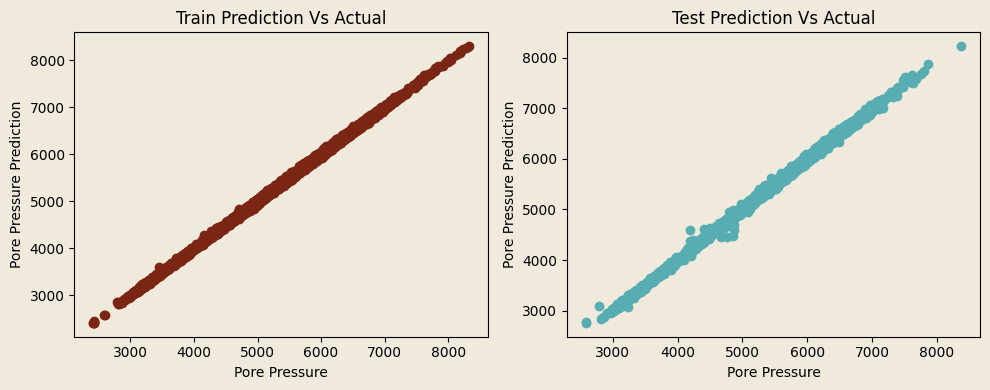

In [ ]:
# Prediction & Test Graph of Predicted Vs Actual Pore Pressure on MLP After Hyperparameter Tuning
def visualize_performance(Y_train_xgb, best_prediction_train_xgb, Y_test_xgb, best_prediction_test_xgb):
    fig, axs = plt.subplots(1, 2, figsize=(10, 4), facecolor='#F0EADD')

    # Training set scatter plot
    axs[0].scatter(Y_train_xgb, best_prediction_train_xgb, color="#7B2514")
    axs[0].set_facecolor('#F0EADD')
    axs[0].set_xlabel("Pore Pressure")
    axs[0].set_ylabel("Pore Pressure Prediction")
    axs[0].set_title("Train Prediction Vs Actual")

    # Test set scatter plot
    axs[1].scatter(Y_test_xgb, best_prediction_test_xgb, color="#58ADB2")
    axs[1].set_facecolor('#F0EADD')
    axs[1].set_xlabel("Pore Pressure")
    axs[1].set_ylabel("Pore Pressure Prediction")
    axs[1].set_title("Test Prediction Vs Actual")

    plt.tight_layout()
    plt.show()

visualize_performance(Y_train_xgb, best_prediction_train_xgb, Y_test_xgb, best_prediction_test_xgb)

#**Blind Test**

## **Import Library and Dataset**

In [ ]:
# Import Dataset
blind_test = pd.read_excel('/content/drive/MyDrive/Github/Pore Pressure Prediction In Northern Carnarvon Basin/Dataset/GOODWYN-6.xlsx')

## **Exploratory Data Analysis (EDA)**

### **Dataset Description**

---

In [ ]:
# Display 5 Initial Dataset
blind_test.head(5)

,DEPTH.FT,CALI.IN,DT.US/F,GR.GAPI,RHOB.G/C3,PP.PSI
0,2266.500073,19.24016,111.7985,40.38751,2.067432,1392.776925
1,2267.000073,19.29655,111.4183,41.19763,2.061466,1390.543610
2,2267.500073,19.33885,110.9960,41.75476,2.059942,1388.004141
3,2268.000073,19.37135,110.2996,41.91766,2.061438,1383.557225
4,2268.500073,19.40054,110.5740,41.34280,2.061275,1385.755344


In [ ]:
# Display Data Type & Non-null Values
blind_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10162 entries, 0 to 10161
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DEPTH.FT   10162 non-null  float64
 1   CALI.IN    10162 non-null  float64
 2   DT.US/F    10162 non-null  float64
 3   GR.GAPI    10162 non-null  float64
 4   RHOB.G/C3  10162 non-null  float64
 5   PP.PSI     10162 non-null  float64
dtypes: float64(6)
memory usage: 476.5 KB


In [ ]:
# Number of Blank Rows
blind_test.isnull().sum()

DEPTH.FT     0
CALI.IN      0
DT.US/F      0
GR.GAPI      0
RHOB.G/C3    0
PP.PSI       0
dtype: int64

In [ ]:
# Dataset Description
blind_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DEPTH.FT,10162.0,10393.638960,2638.541845,2266.500073,8018.625257,9816.750314,12940.875414,15282.000817
CALI.IN,10162.0,11.966106,1.943910,7.663616,10.752942,12.351030,12.850125,20.365860
DT.US/F,10162.0,84.657985,11.495973,51.351720,75.141370,83.011505,95.144915,134.619900
GR.GAPI,10162.0,90.814385,28.167338,40.006350,59.817418,98.011080,113.993700,182.775100
RHOB.G/C3,10162.0,2.491878,0.173607,1.568559,2.442863,2.529938,2.602560,3.029854
PP.PSI,10162.0,5065.724622,992.799812,1354.655624,4453.146386,4848.836035,5563.255104,9472.135973


In [ ]:
# Shape Of The Dataset
blind_test.shape

(10162, 6)

In [ ]:
# Column Of The Dataset
blind_test.columns

Index(['DEPTH.FT', 'CALI.IN', 'DT.US/F', 'GR.GAPI', 'RHOB.G/C3', 'PP.PSI'], dtype='object')

### **Univariate Data Analysis**

---

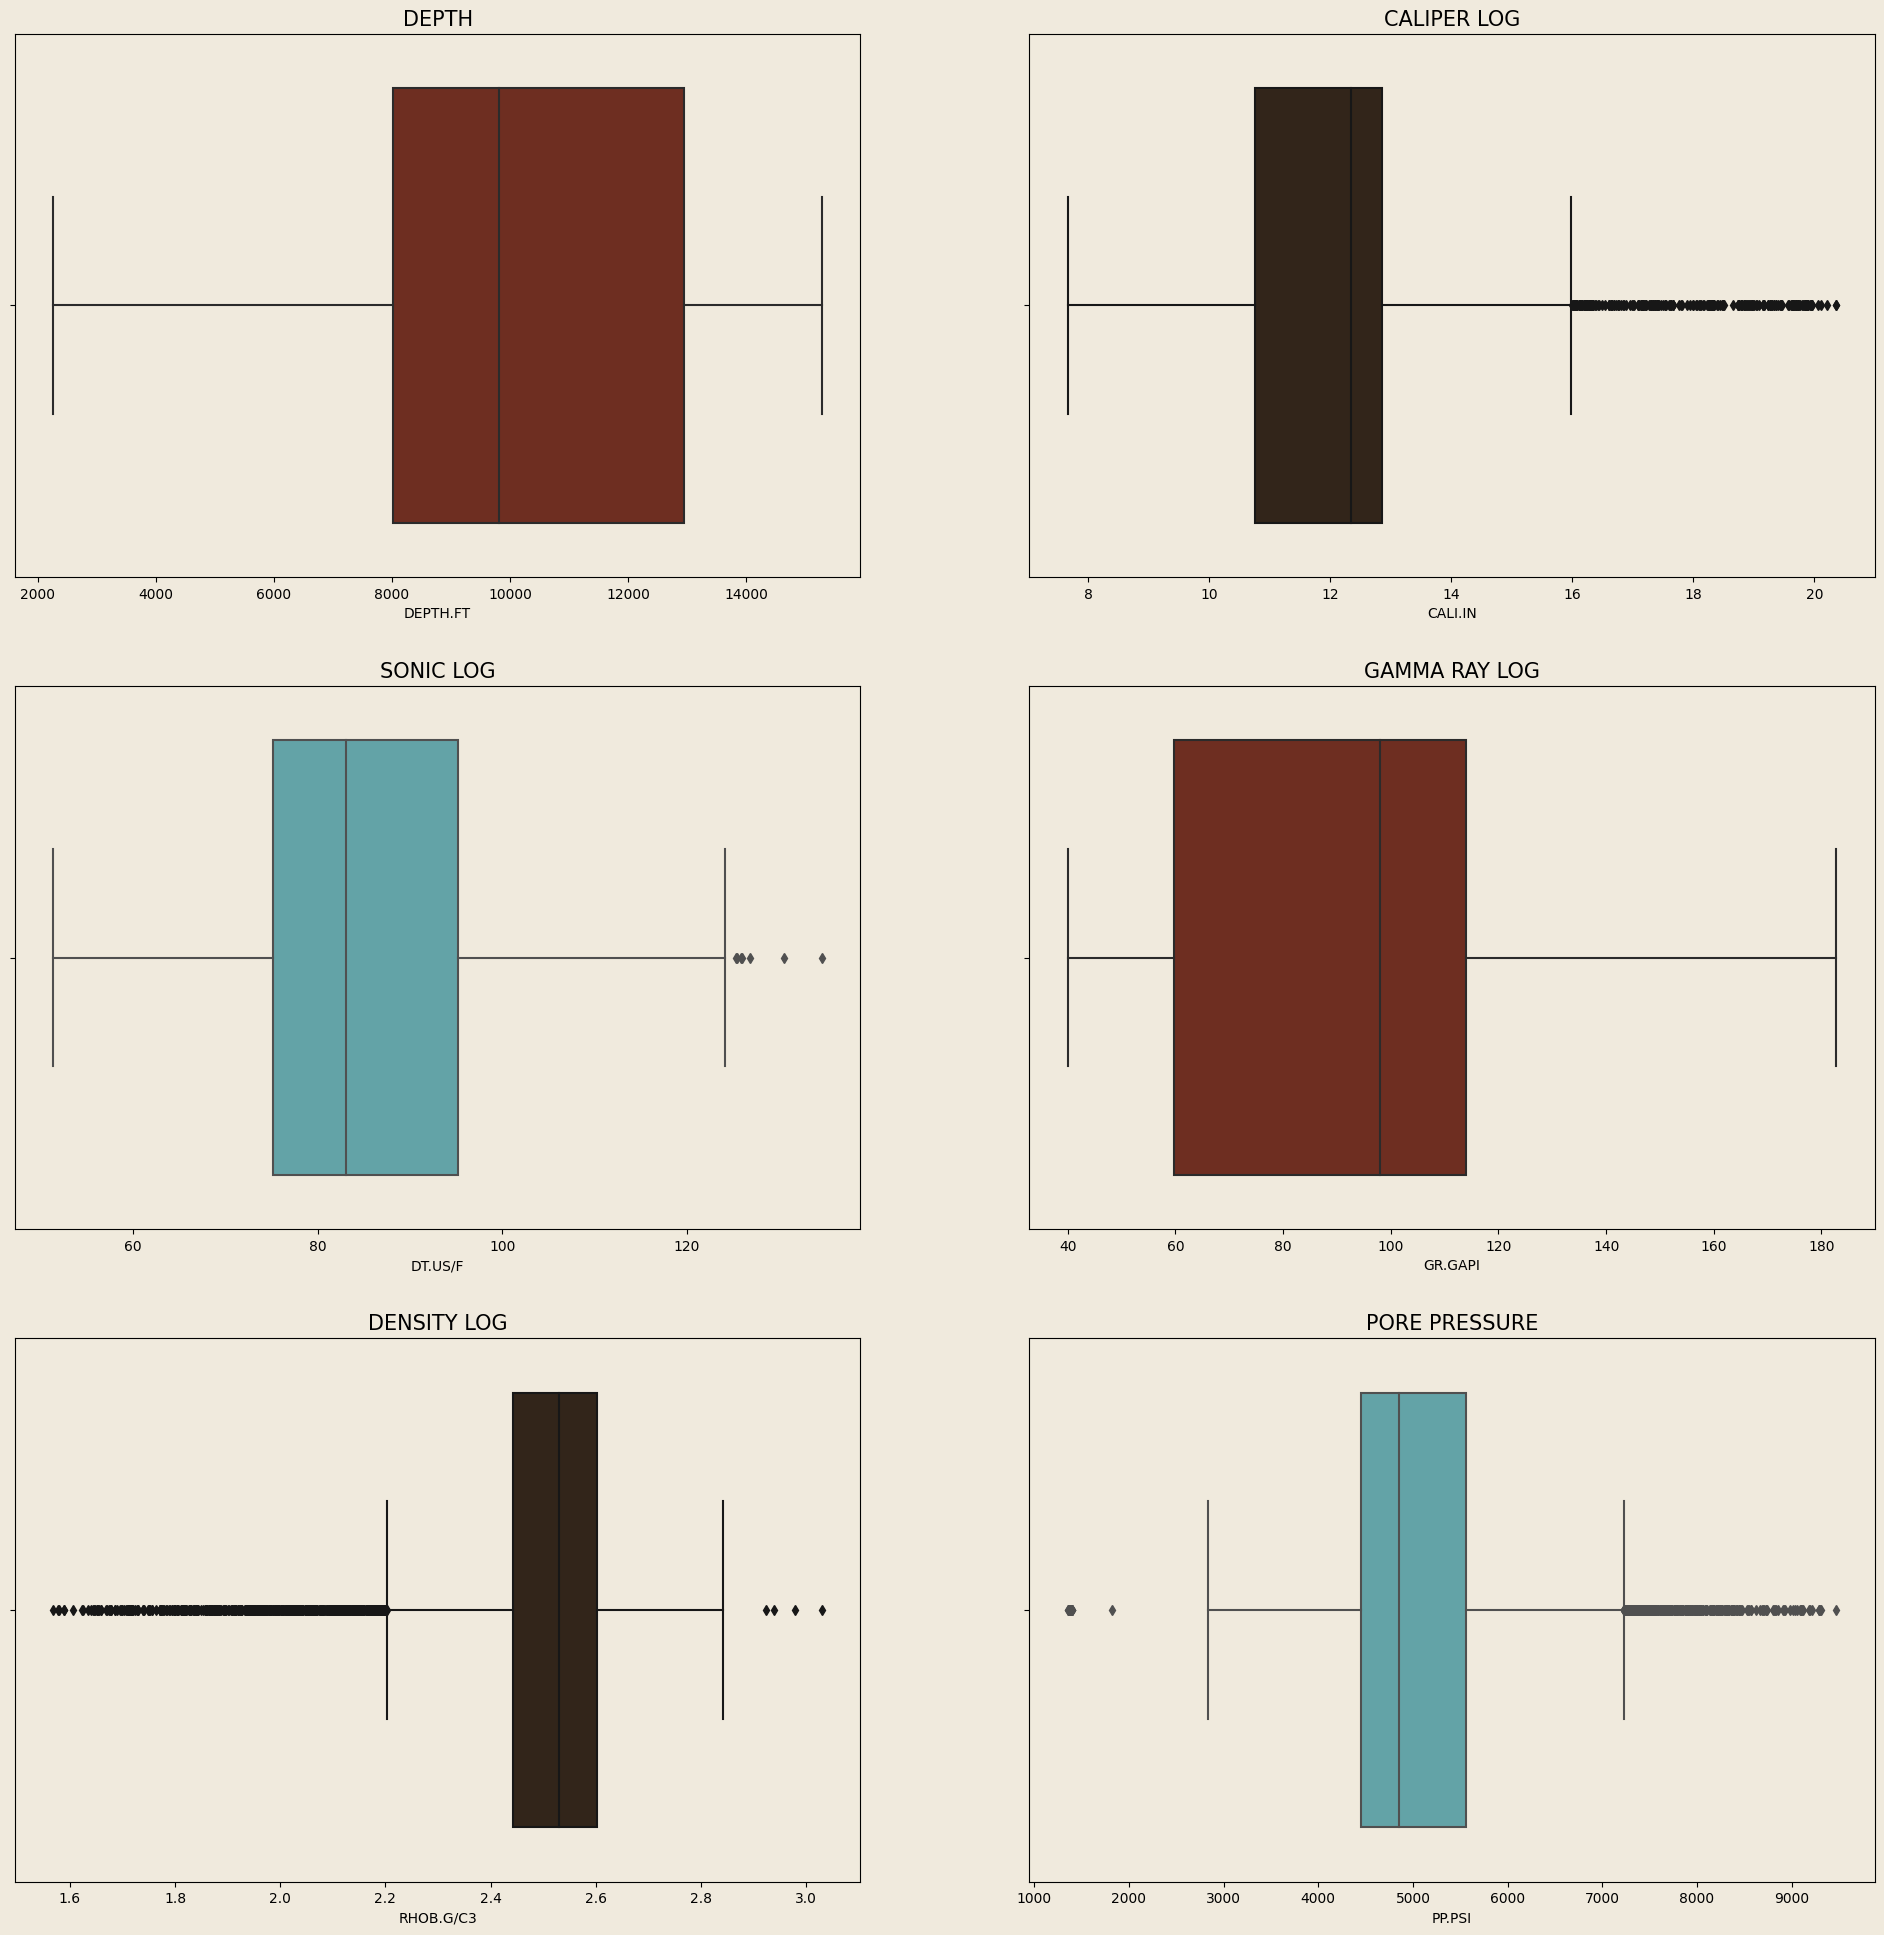

In [ ]:
# Create Figure And Axis
fig, axes = plt.subplots(3, 2, figsize=(24, 24), facecolor='#F0EADD')

# Create Box-Plot For Depth
sns.boxplot(x=blind_test['DEPTH.FT'], color="#7B2514", ax=axes[0, 0])
axes[0, 0].set_title('DEPTH', fontsize=15)
axes[0, 0].set_facecolor('#F0EADD')

# Create Box-Plot For Caliper Log
sns.boxplot(x=blind_test['CALI.IN'], color="#362416", ax=axes[0, 1])
axes[0, 1].set_title('CALIPER LOG', fontsize=15)
axes[0, 1].set_facecolor('#F0EADD')

# Create Box-Plot For Sonic Log
sns.boxplot(x=blind_test['DT.US/F'], color="#58ADB2", ax=axes[1, 0])
axes[1, 0].set_title('SONIC LOG', fontsize=15)
axes[1, 0].set_facecolor('#F0EADD')

# Create Box-Plot For Gamma Ray Log
sns.boxplot(x=blind_test['GR.GAPI'], color="#7B2514", ax=axes[1, 1])
axes[1, 1].set_title('GAMMA RAY LOG', fontsize=15)
axes[1, 1].set_facecolor('#F0EADD')

# Create Box-Plot For Density Log
sns.boxplot(x=blind_test['RHOB.G/C3'], color="#362416", ax=axes[2, 0])
axes[2, 0].set_title('DENSITY LOG', fontsize=15)
axes[2, 0].set_facecolor('#F0EADD')

# Create Box-Plot For Pore Pressure
sns.boxplot(x=blind_test['PP.PSI'], color="#58ADB2", ax=axes[2, 1])
axes[2, 1].set_title('PORE PRESSURE', fontsize=15)
axes[2, 1].set_facecolor('#F0EADD')

plt.show()

### **Outliers Removal**

---

In [ ]:
# Set Outlier using Z-score Method
z_scores = stats.zscore(blind_test)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
blind_test = blind_test[filtered_entries]

In [ ]:
# Dataset Description After Removing Outlier
blind_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DEPTH.FT,9708.0,10346.465430,2596.894614,5901.500189,8004.375256,9750.750312,12861.125412,15282.000817
CALI.IN,9708.0,11.830346,1.735664,7.663616,10.682913,12.339940,12.737748,17.660780
DT.US/F,9708.0,84.340055,11.291181,55.915440,74.929700,82.562195,94.993330,118.411100
GR.GAPI,9708.0,90.577500,28.137272,40.006350,59.568700,97.467560,114.058050,172.425500
RHOB.G/C3,9708.0,2.512969,0.132943,1.972627,2.452124,2.536442,2.605038,2.979227
PP.PSI,9708.0,5015.312078,890.525479,2870.969512,4448.400672,4821.539355,5469.374943,8035.562999


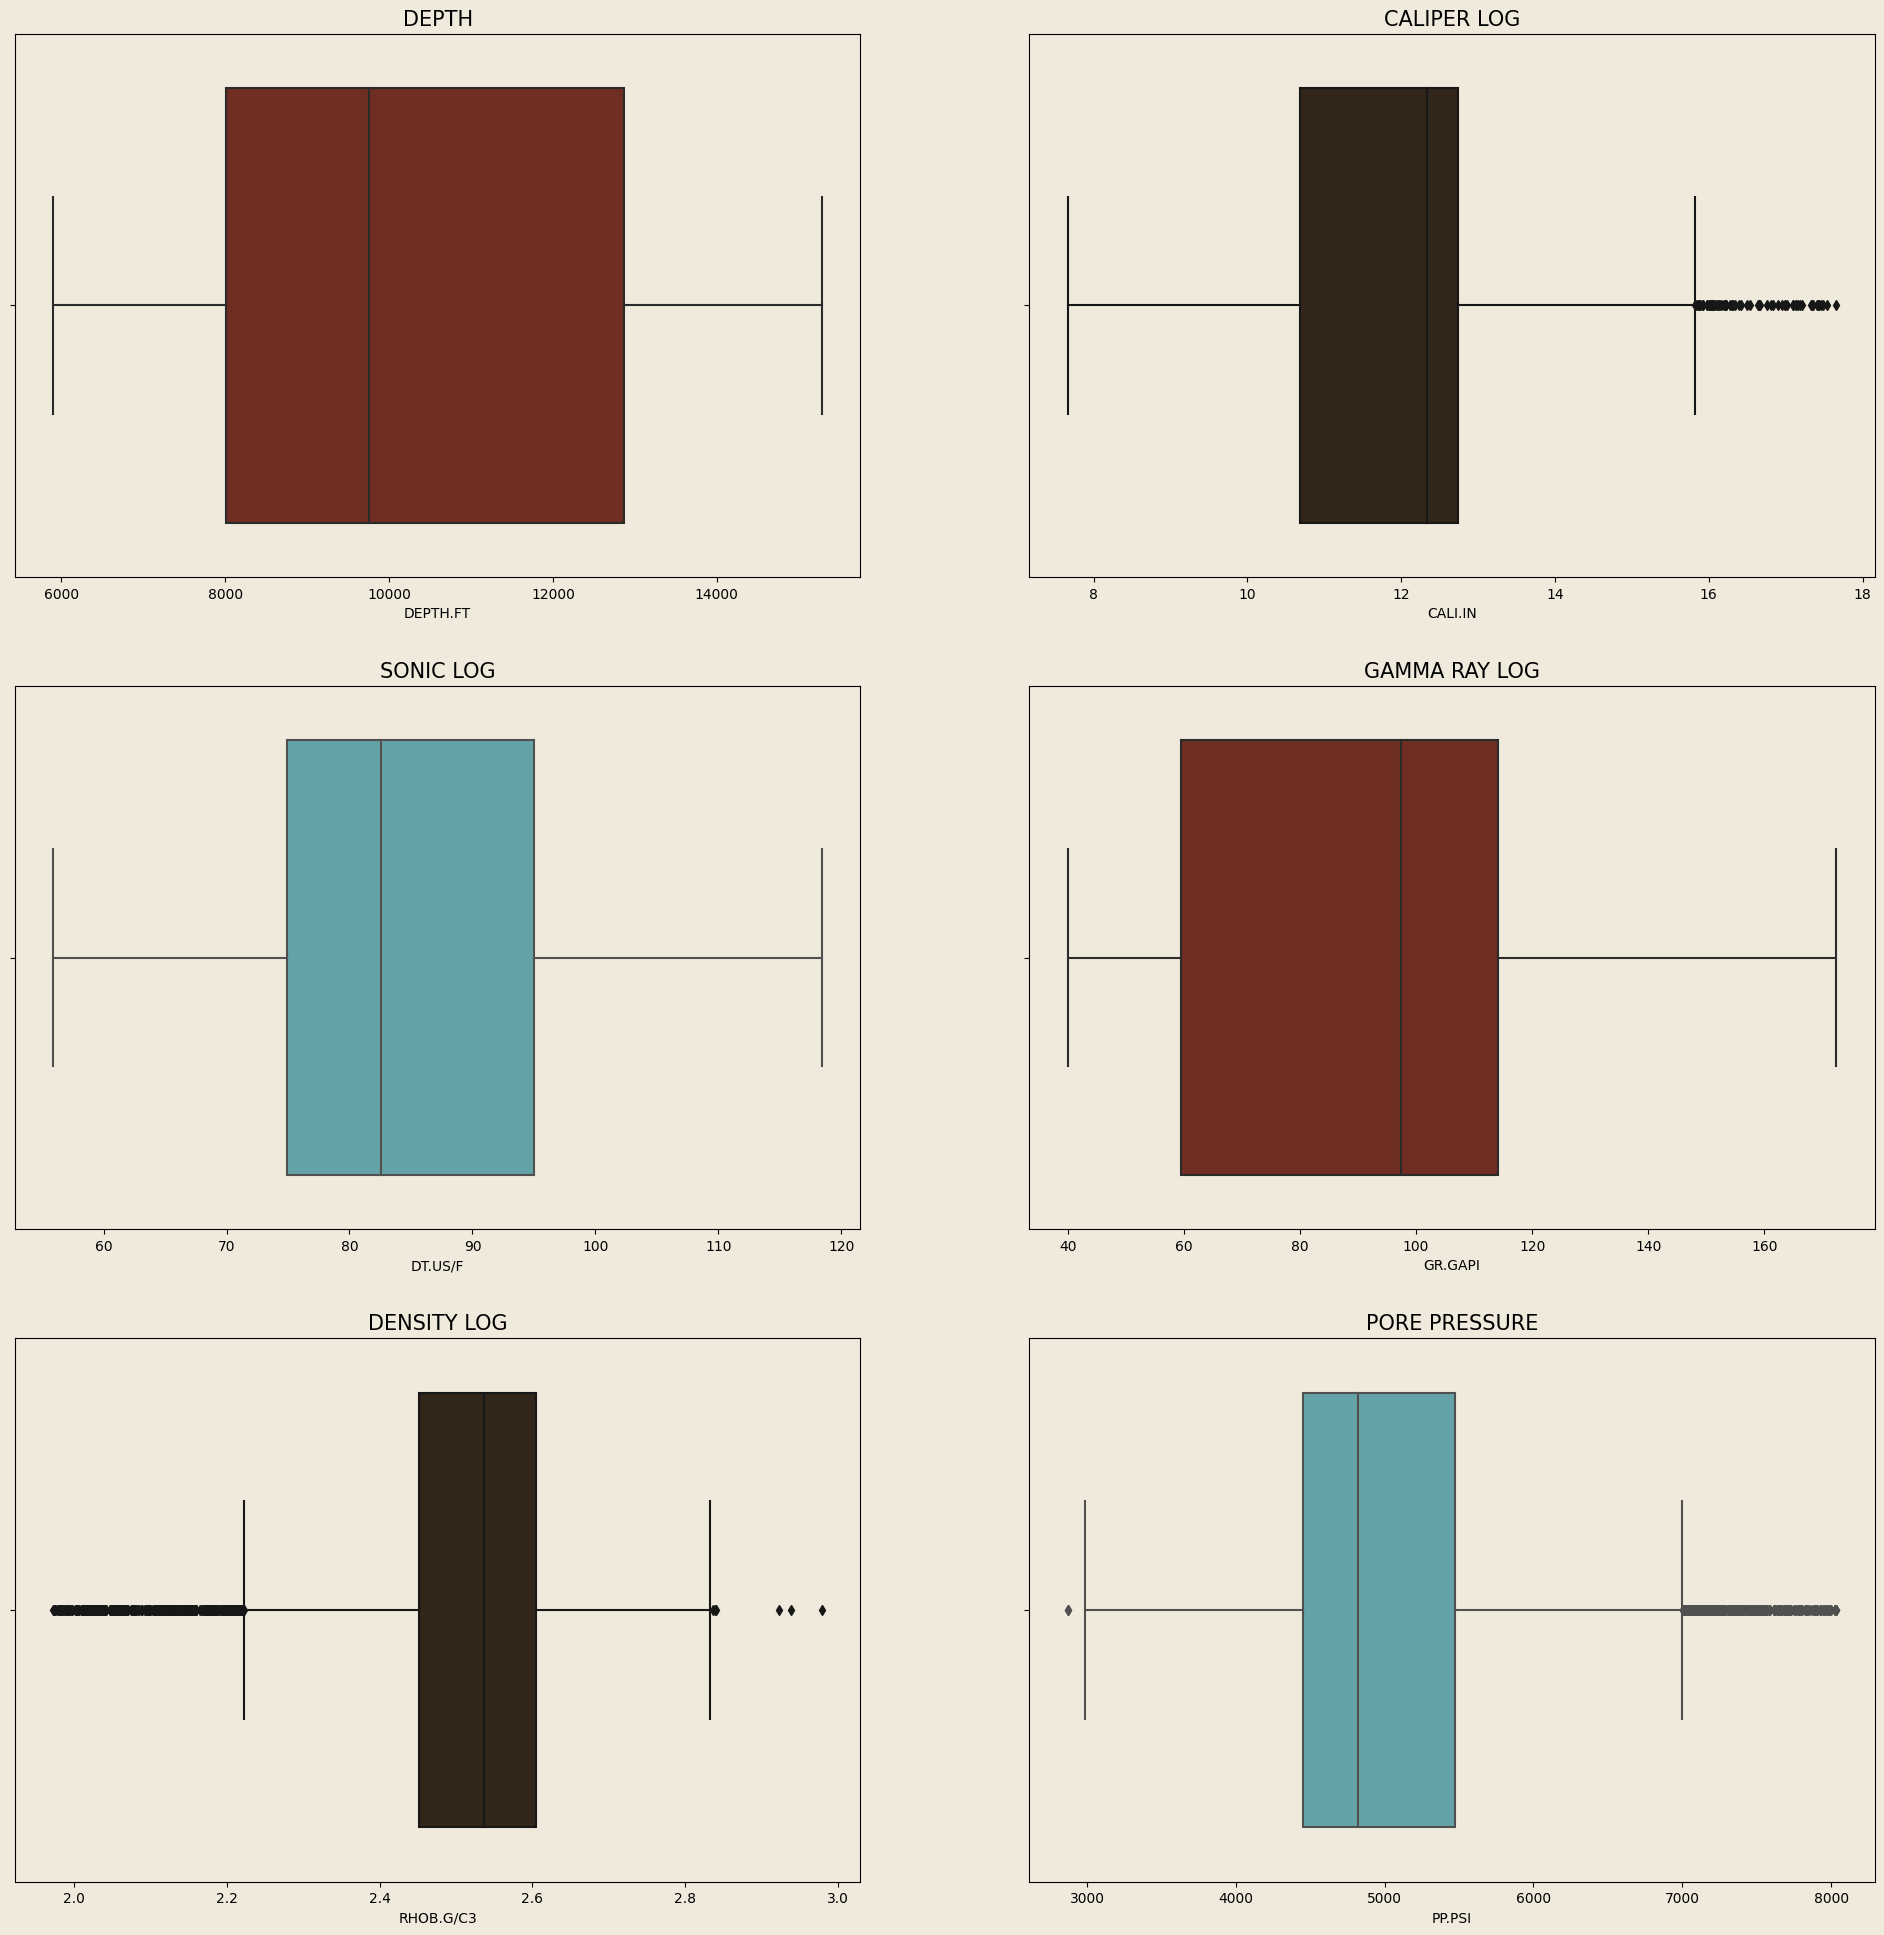

In [ ]:
# Create Figure And Axis
fig, axes = plt.subplots(3, 2, figsize=(24, 24), facecolor='#F0EADD')

# Create Box-Plot For Depth
sns.boxplot(x=blind_test['DEPTH.FT'], color="#7B2514", ax=axes[0, 0])
axes[0, 0].set_title('DEPTH', fontsize=15)
axes[0, 0].set_facecolor('#F0EADD')

# Create Box-Plot For Caliper Log
sns.boxplot(x=blind_test['CALI.IN'], color="#362416", ax=axes[0, 1])
axes[0, 1].set_title('CALIPER LOG', fontsize=15)
axes[0, 1].set_facecolor('#F0EADD')

# Create Box-Plot For Sonic Log
sns.boxplot(x=blind_test['DT.US/F'], color="#58ADB2", ax=axes[1, 0])
axes[1, 0].set_title('SONIC LOG', fontsize=15)
axes[1, 0].set_facecolor('#F0EADD')

# Create Box-Plot For Gamma Ray Log
sns.boxplot(x=blind_test['GR.GAPI'], color="#7B2514", ax=axes[1, 1])
axes[1, 1].set_title('GAMMA RAY LOG', fontsize=15)
axes[1, 1].set_facecolor('#F0EADD')

# Create Box-Plot For Density Log
sns.boxplot(x=blind_test['RHOB.G/C3'], color="#362416", ax=axes[2, 0])
axes[2, 0].set_title('DENSITY LOG', fontsize=15)
axes[2, 0].set_facecolor('#F0EADD')

# Create Box-Plot For Pore Pressure
sns.boxplot(x=blind_test['PP.PSI'], color="#58ADB2", ax=axes[2, 1])
axes[2, 1].set_title('PORE PRESSURE', fontsize=15)
axes[2, 1].set_facecolor('#F0EADD')

plt.show()

### **Multivariate Data Analysis**

---

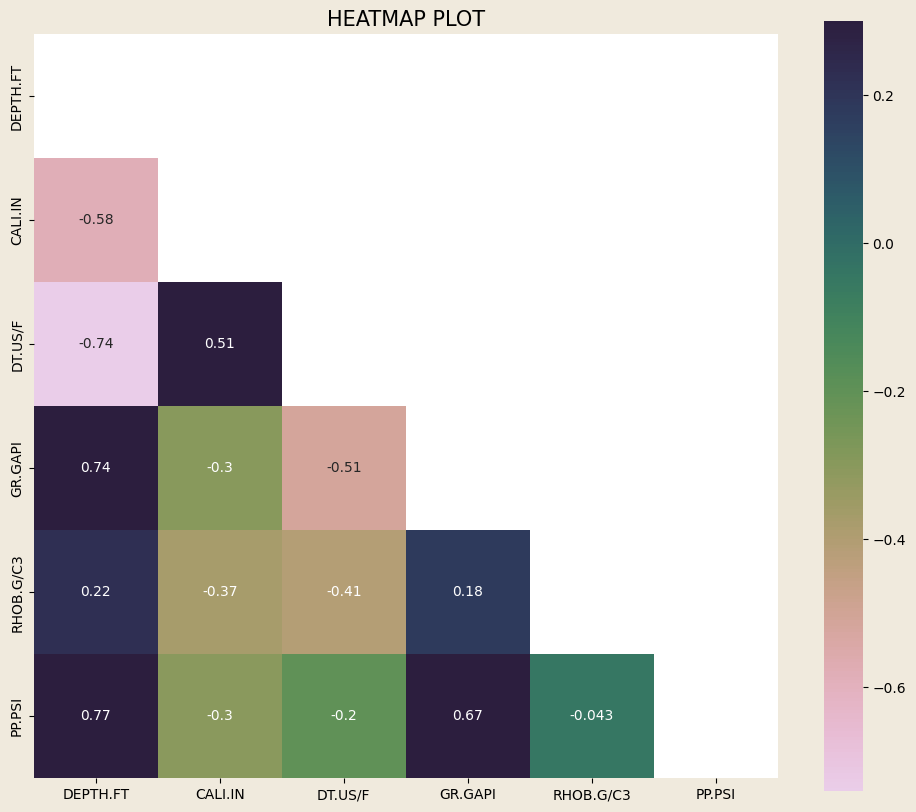

In [ ]:
# Generate A Mask For The Upper Triangle
corr = blind_test.corr(method = 'pearson')
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Create A Colormap
cmap = sns.cubehelix_palette(n_colors=8, start=-2.25, rot=-1.3, as_cmap=True)

# Plot The Heatmap
plt.figure(figsize=(12,10), facecolor='#F0EADD')
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=.3, square=True)

plt.title('HEATMAP PLOT', fontsize=15)
plt.show()

## **Data Preprocessing**

In [ ]:
# Set Independent Features & Dependent Features Data
V = blind_test.drop(columns=['PP.PSI'], axis=1)
W = blind_test['PP.PSI']

In [ ]:
# Split Data Training & Data Test
V_train, V_test, W_train, W_test = train_test_split(V, W, test_size=0.3, random_state=0)

In [ ]:
# Standardization Using Standard Scaler
scalerV = StandardScaler().fit(V_train)
V_train_scaled = scalerV.transform(V_train)
V_test_scaled = scalerV.transform(V_test)

In [ ]:
# Split For Modelling MLP Regressor
V_train_mlp = V_train; W_train_mlp = W_train; V_train_scaled_mlp = V_train_scaled
V_test_mlp = V_test; W_test_mlp = W_test; V_test_scaled_mlp = V_test_scaled

# Split For Modelling Random Forest Regressor
V_train_rf = V_train; W_train_rf = W_train; V_train_scaled_rf = V_train_scaled
V_test_rf = V_test; W_test_rf = W_test; V_test_scaled_rf = V_test_scaled

# Split For Modelling XGBoost Regressor
V_train_xgb = V_train; W_train_xgb = W_train; V_train_scaled_xgb = V_train_scaled
V_test_xgb = V_test; W_test_xgb = W_test; V_test_scaled_xgb = V_test_scaled

## **MLP Model**

In [ ]:
# Set Best Model MLP Regressor For Blind Test
best_random_mlp_bt = mlp_random_search.best_estimator_
best_random_mlp_bt.fit(V_train_scaled_mlp, W_train_mlp)

MLPRegressor(alpha=0.1, batch_size=200, learning_rate='adaptive', max_iter=500,
             random_state=0, solver='lbfgs')

### **Train Modelling**

---



In [ ]:
# Make Predictions & Evaluate The Model's Performance
best_prediction_train_bt_mlp = best_random_mlp_bt.predict(V_train_scaled_mlp)

# Calculate The Metrics
r2_train = round(r2_score(W_train_mlp, best_prediction_train_bt_mlp),4)
mape_train = round(metrics.mean_absolute_percentage_error(W_train_mlp, best_prediction_train_bt_mlp),4)
mae_train = round(metrics.mean_absolute_error(W_train_mlp, best_prediction_train_bt_mlp),4)
rmse_train = round(sqrt(metrics.mean_squared_error(W_train_mlp, best_prediction_train_bt_mlp)),4)
mse_train = round(metrics.mean_squared_error(W_train_mlp, best_prediction_train_bt_mlp),4)

# Print The Metrics
print('Metrics Score Training Blindtest Data')
print('R2\t', r2_train)
print('MAPE\t', mape_train)
print('MAE\t', mae_train)
print('RMSE\t', rmse_train)
print('MSE\t', mse_train)

Metrics Score Training Blindtest Data
R2	 0.9999
MAPE	 0.0009
MAE	 4.3432
RMSE	 6.682
MSE	 44.6487


### **Test Modelling**

---



In [ ]:
# Make Predictions & Evaluate The Model's Performance
best_prediction_test_bt_mlp = best_random_mlp_bt.predict(V_test_scaled_mlp)

# Calculate The Metrics
r2_test = round(r2_score(W_test_mlp, best_prediction_test_bt_mlp),4)
mape_test = round(metrics.mean_absolute_percentage_error(W_test_mlp, best_prediction_test_bt_mlp),4)
mae_test = round(metrics.mean_absolute_error(W_test_mlp, best_prediction_test_bt_mlp),4)
rmse_test = round(sqrt(metrics.mean_squared_error(W_test_mlp, best_prediction_test_bt_mlp)),4)
mse_test = round(metrics.mean_squared_error(W_test_mlp, best_prediction_test_bt_mlp),4)

# Print The Metrics
print('Metrics Score Test Blindtest Data')
print('R2\t', r2_test)
print('MAPE\t', mape_test)
print('MAE\t', mae_test)
print('RMSE\t', rmse_test)
print('MSE\t', mse_test)

Metrics Score Test Blindtest Data
R2	 0.9999
MAPE	 0.001
MAE	 4.7408
RMSE	 10.364
MSE	 107.4125


In [ ]:
# Run-time
all_features_time = []

for _ in range(5):
    start_time = time.time()
    best_random_mlp_bt.fit(V_train_scaled_mlp, W_train_mlp)
    predictions_nn = best_random_mlp_bt.predict(V_test_scaled_mlp)
    end_time = time.time()
    all_features_time.append(end_time - start_time)

all_features_time = np.mean(all_features_time)
print('Run-time:', round(all_features_time, 2), 'seconds.')

Run-time: 14.02 seconds.


### **Prediction & Test Graph of Predicted Vs Actual**

---



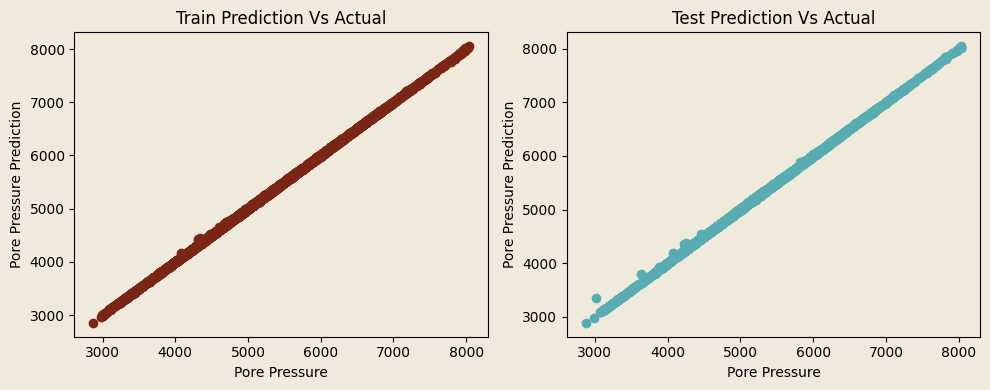

In [ ]:
# Prediction & Test Graph of Predicted Vs Actual Pore Pressure on Blind Test
def visualize_performance(W_train_mlp, best_prediction_train_bt_mlp, W_test_mlp, best_prediction_test_bt_mlp):
    fig, axs = plt.subplots(1, 2, figsize=(10, 4), facecolor='#F0EADD')

    # Training set scatter plot
    axs[0].scatter(W_train_mlp, best_prediction_train_bt_mlp, color="#7B2514")
    axs[0].set_facecolor('#F0EADD')
    axs[0].set_xlabel("Pore Pressure")
    axs[0].set_ylabel("Pore Pressure Prediction")
    axs[0].set_title("Train Prediction Vs Actual")

    # Test set scatter plot
    axs[1].scatter(W_test_mlp, best_prediction_test_bt_mlp, color="#58ADB2")
    axs[1].set_facecolor('#F0EADD')
    axs[1].set_xlabel("Pore Pressure")
    axs[1].set_ylabel("Pore Pressure Prediction")
    axs[1].set_title("Test Prediction Vs Actual")

    plt.tight_layout()
    plt.show()

visualize_performance(W_train_mlp, best_prediction_train_bt_mlp, W_test_mlp, best_prediction_test_bt_mlp)

## **Random Forest Model**

In [ ]:
# Set Best Model Random Forest Regressor For Blind Test
best_random_rf_bt = rf_random_search.best_estimator_
best_random_rf_bt.fit(V_train_scaled_rf, W_train_rf)

RandomForestRegressor(max_depth=30, max_features='auto', min_samples_split=5,
                      n_estimators=124, random_state=0)

### **Train Modelling**

---



In [ ]:
# Make Predictions & Evaluate The Model's Performance
best_prediction_train_bt_rf = best_random_rf_bt.predict(V_train_scaled_rf)

# Calculate The Metrics
r2_train = round(r2_score(W_train_rf, best_prediction_train_bt_rf),4)
mape_train = round(metrics.mean_absolute_percentage_error(W_train_rf, best_prediction_train_bt_rf),4)
mae_train = round(metrics.mean_absolute_error(W_train_rf, best_prediction_train_bt_rf),4)
rmse_train = round(sqrt(metrics.mean_squared_error(W_train_rf, best_prediction_train_bt_rf)),4)
mse_train = round(metrics.mean_squared_error(W_train_rf, best_prediction_train_bt_rf),4)

# Print The Metrics
print('Metrics Score Training Blindtest Data')
print('R2\t', r2_train)
print('MAPE\t', mape_train)
print('MAE\t', mae_train)
print('RMSE\t', rmse_train)
print('MSE\t', mse_train)

Metrics Score Training Blindtest Data
R2	 0.9997
MAPE	 0.0016
MAE	 8.018
RMSE	 16.232
MSE	 263.4769


### **Test Modelling**

---



In [ ]:
# Make Predictions & Evaluate The Model's Performance
best_prediction_test_bt_rf = best_random_rf_bt.predict(V_test_scaled_rf)

# Calculate The Metrics
r2_test = round(r2_score(W_test_rf, best_prediction_test_bt_rf),4)
mape_test = round(metrics.mean_absolute_percentage_error(W_test_rf, best_prediction_test_bt_rf),4)
mae_test = round(metrics.mean_absolute_error(W_test_rf, best_prediction_test_bt_rf),4)
rmse_test = round(sqrt(metrics.mean_squared_error(W_test_rf, best_prediction_test_bt_rf)),4)
mse_test = round(metrics.mean_squared_error(W_test_rf, best_prediction_test_bt_rf),4)

# Print The Metrics
print('Metrics Score Test Blindtest Data')
print('R2\t', r2_test)
print('MAPE\t', mape_test)
print('MAE\t', mae_test)
print('RMSE\t', rmse_test)
print('MSE\t', mse_test)

Metrics Score Test Blindtest Data
R2	 0.9975
MAPE	 0.0036
MAE	 17.7363
RMSE	 44.1829
MSE	 1952.1265


In [ ]:
# Run-time
all_features_time = []

for _ in range(5):
    start_time = time.time()
    best_random_rf_bt.fit(V_train_scaled_rf, W_train_rf)
    predictions_nn = best_random_rf_bt.predict(V_test_scaled_rf)
    end_time = time.time()
    all_features_time.append(end_time - start_time)

all_features_time = np.mean(all_features_time)
print('Run-time:', round(all_features_time, 2), 'seconds.')

Run-time: 2.75 seconds.


### **Prediction & Test Graph of Predicted Vs Actual**

---



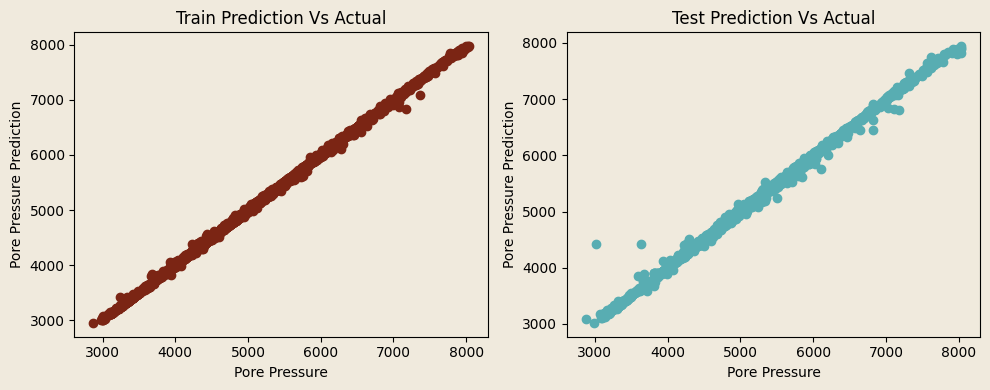

In [ ]:
# Prediction & Test Graph of Predicted Vs Actual Pore Pressure on Blind Test
def visualize_performance(W_train_rf, best_prediction_train_bt_rf, W_test_rf, best_prediction_test_bt_rf):
    fig, axs = plt.subplots(1, 2, figsize=(10, 4), facecolor='#F0EADD')

    # Training set scatter plot
    axs[0].scatter(W_train_rf, best_prediction_train_bt_rf, color="#7B2514")
    axs[0].set_facecolor('#F0EADD')
    axs[0].set_xlabel("Pore Pressure")
    axs[0].set_ylabel("Pore Pressure Prediction")
    axs[0].set_title("Train Prediction Vs Actual")

    # Test set scatter plot
    axs[1].scatter(W_test_rf, best_prediction_test_bt_rf, color="#58ADB2")
    axs[1].set_facecolor('#F0EADD')
    axs[1].set_xlabel("Pore Pressure")
    axs[1].set_ylabel("Pore Pressure Prediction")
    axs[1].set_title("Test Prediction Vs Actual")

    plt.tight_layout()
    plt.show()

visualize_performance(W_train_rf, best_prediction_train_bt_rf, W_test_rf, best_prediction_test_bt_rf)

## **XGBboost Model**

In [ ]:
# Set Best Model MLP Regressor For Blind Test
best_random_xgb_bt = xgb_random_search.best_estimator_
best_random_xgb_bt.fit(V_train_scaled_xgb, W_train_xgb)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.6, colsample_bynode=None,
             colsample_bytree=0.7999999999999999, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, random_state=0, ...)

### **Train Modelling**

In [ ]:
# Make Predictions & Evaluate The Model's Performance
best_prediction_train_bt_xgb = best_random_xgb_bt.predict(V_train_scaled_xgb)

# Calculate The Metrics
r2_train = round(r2_score(W_train_xgb, best_prediction_train_bt_xgb),4)
mape_train = round(metrics.mean_absolute_percentage_error(W_train_xgb, best_prediction_train_bt_xgb),4)
mae_train = round(metrics.mean_absolute_error(W_train_xgb, best_prediction_train_bt_xgb),4)
rmse_train = round(sqrt(metrics.mean_squared_error(W_train_xgb, best_prediction_train_bt_xgb)),4)
mse_train = round(metrics.mean_squared_error(W_train_xgb, best_prediction_train_bt_xgb),4)

# Print The Metrics
print('Metrics Score Training Blindtest Data')
print('R2\t', r2_train)
print('MAPE\t', mape_train)
print('MAE\t', mae_train)
print('RMSE\t', rmse_train)
print('MSE\t', mse_train)

Metrics Score Training Blindtest Data
R2	 0.9995
MAPE	 0.003
MAE	 15.2277
RMSE	 20.378
MSE	 415.2641


### **Test Modelling**

In [ ]:
# Make Predictions & Evaluate The Model's Performance
best_prediction_test_bt_xgb = best_random_xgb_bt.predict(V_test_scaled_xgb)

# Calculate The Metrics
r2_test = round(r2_score(W_test_xgb, best_prediction_test_bt_xgb),4)
mape_test = round(metrics.mean_absolute_percentage_error(W_test_xgb, best_prediction_test_bt_xgb),4)
mae_test = round(metrics.mean_absolute_error(W_test_xgb, best_prediction_test_bt_xgb),4)
rmse_test = round(sqrt(metrics.mean_squared_error(W_test_xgb, best_prediction_test_bt_xgb)),4)
mse_test = round(metrics.mean_squared_error(W_test_xgb, best_prediction_test_bt_xgb),4)

# Print The Metrics
print('Metrics Score Test Blindtest Data')
print('R2\t', r2_test)
print('MAPE\t', mape_test)
print('MAE\t', mae_test)
print('RMSE\t', rmse_test)
print('MSE\t', mse_test)

Metrics Score Test Blindtest Data
R2	 0.9963
MAPE	 0.006
MAE	 29.9491
RMSE	 54.3186
MSE	 2950.5157


In [ ]:
# Run-time
all_features_time = []

for _ in range(5):
    start_time = time.time()
    best_random_xgb_bt.fit(V_train_scaled_xgb, W_train_xgb)
    predictions_nn = best_random_xgb_bt.predict(V_test_scaled_xgb)
    end_time = time.time()
    all_features_time.append(end_time - start_time)

all_features_time = np.mean(all_features_time)
print('Run-time:', round(all_features_time, 2), 'seconds.')

Run-time: 0.78 seconds.


### **Prediction & Test Graph of Predicted Vs Actual**

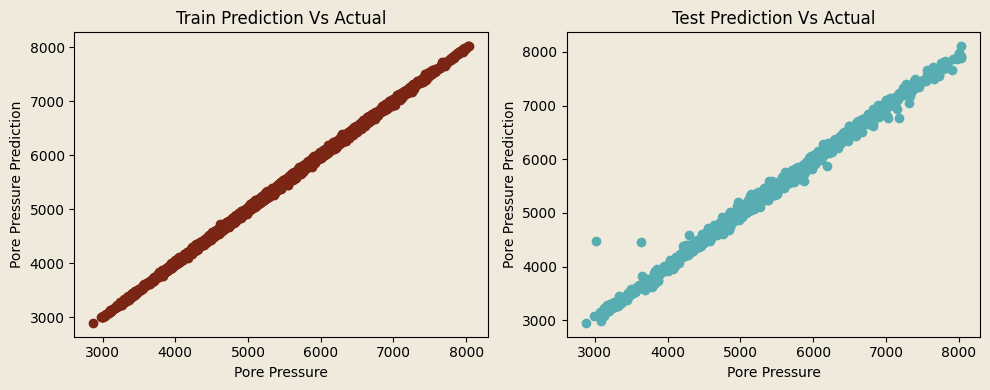

In [ ]:
# Prediction & Test Graph of Predicted Vs Actual Pore Pressure on Blind Test
def visualize_performance(W_train_xgb, best_prediction_train_bt_xgb, W_test_xgb, best_prediction_test_bt_xgb):
    fig, axs = plt.subplots(1, 2, figsize=(10, 4), facecolor='#F0EADD')

    # Training set scatter plot
    axs[0].scatter(W_train_xgb, best_prediction_train_bt_xgb, color="#7B2514")
    axs[0].set_facecolor('#F0EADD')
    axs[0].set_xlabel("Pore Pressure")
    axs[0].set_ylabel("Pore Pressure Prediction")
    axs[0].set_title("Train Prediction Vs Actual")

    # Test set scatter plot
    axs[1].scatter(W_test_xgb, best_prediction_test_bt_xgb, color="#58ADB2")
    axs[1].set_facecolor('#F0EADD')
    axs[1].set_xlabel("Pore Pressure")
    axs[1].set_ylabel("Pore Pressure Prediction")
    axs[1].set_title("Test Prediction Vs Actual")

    plt.tight_layout()
    plt.show()

visualize_performance(W_train_xgb, best_prediction_train_bt_xgb, W_test_xgb, best_prediction_test_bt_xgb)